In [1]:

import h5py

import pandas as pd

import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from mpl_toolkits import mplot3d

from scipy.stats import norm
from scipy.special import factorial
from scipy.stats import poisson

import random

import os

import pickle



%matplotlib inline

In [2]:
def gkern(l=5, sig=10., eta = 2):
    """\
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.abs(ax)**eta / np.abs(sig)**eta)
    kernel = np.outer(gauss, gauss)
#     norm = np.linalg.norm(kernel)
    norm = np.sum(kernel)
    return kernel / norm

In [3]:
def convolve(h_1, y):
    Y = np.fft.fft2(y)
    N = len(y)
    
    H_1 = np.fft.fft2(h_1, (N,N)) 
    
    F = Y*H_1
    
    F = np.fft.ifft2(F)
    
    return np.real(F)

In [4]:
hits8 = pd.DataFrame(np.array(h5py.File('Pb210_2mm_100008.sim.h5')['MC']['hits']))

In [5]:
os.chdir("/Users/byrnesnk/nexus/")

In [790]:
pickle.dump( particles7, open( "/Users/byrnesnk/nexus/Pb210_2mm_100007_particles.p", "wb" ) )

In [6]:
particles8 = pd.DataFrame(np.array(h5py.File('Pb210_2mm_100008.sim.h5')['MC']['particles']))

In [7]:
pileup = []
while len(pileup) < 500:
    gauss = np.random.normal(0.448, 1)
    if gauss < 0:
        continue
    else:
        pileup.append(gauss)
    

In [8]:
pileup = (np.round(pileup))

print(np.max(pileup))

3.0


In [9]:
particle_sorter_alpha = (particles8[(particles8['particle_name']==b'Pb206')]['particle_id'].values)
particle_sorter_beta = []
for i in range(0,50):
    betas = (particles8[(particles8['event_id']==i)&
                                       (particles8['particle_name']==b'e-')]['particle_id'].values)
    particle_sorter_beta.append(betas[-1])


particle_sorted_alpha = {}
hits_x_alpha = {}
hits_y_alpha = {}
hits_z_alpha = {}

particle_sorted_beta = {}
hits_x_beta = {}
hits_y_beta = {}
hits_z_beta = {}

for i in range(0,50):
    
    particle_sorted_alpha[i] = (particles8[(particles8['particle_id'] > particle_sorter_alpha[i])&
                                     (particles8['event_id']==i)])    
    
    particle_sorted_beta[i] = (particles8[(particles8['particle_id'] < particle_sorter_alpha[i])&
                                     (particles8['event_id']==i)])
for i in range(0,50):
    hits_x_beta[i] =hits8[(hits8['particle_id']==particle_sorter_beta[i])&(hits8['event_id']==i)]['x']
    hits_y_beta[i] =hits8[(hits8['particle_id']==particle_sorter_beta[i])&(hits8['event_id']==i)]['y']
    hits_z_beta[i] =hits8[(hits8['particle_id']==particle_sorter_beta[i])&(hits8['event_id']==i)]['z']
    
    hits_x_alpha[i] =hits8[(hits8['particle_id']==particle_sorter_alpha[i])&(hits8['event_id']==i)]['x']
    hits_y_alpha[i] =hits8[(hits8['particle_id']==particle_sorter_alpha[i])&(hits8['event_id']==i)]['y']
    hits_z_alpha[i] =hits8[(hits8['particle_id']==particle_sorter_alpha[i])&(hits8['event_id']==i)]['z']



In [10]:
particle_fin_alpha = pd.concat(particle_sorted_alpha)
x_fin_alpha = pd.concat(hits_x_alpha)
y_fin_alpha = pd.concat(hits_y_alpha)
z_fin_alpha = pd.concat(hits_z_alpha)

particle_fin_beta = pd.concat(particle_sorted_beta)
x_fin_beta = pd.concat(hits_x_beta)
y_fin_beta = pd.concat(hits_y_beta)
z_fin_beta = pd.concat(hits_z_beta)

In [11]:
# x1 = particles1[(particles1['initial_t'] < 1e+14 )&(particles1['particle_name'] == b'ie-' )]['final_x']
# y1 = particles1[(particles1['initial_t'] < 1e+14 )&(particles1['particle_name'] == b'ie-' )]['final_y']

# (particles6['initial_t'] < 1e+14 )

hits_x = {}
hits_y = {}
hits_z = {}
particles = {}

for i in range(0,500):
    pileup_counter = pileup[i]
    if pileup_counter == 0:
        particles['x'+str(i)] = np.asarray([0.0])
        particles['y'+str(i)] = np.asarray([0.0])
        hits_x[i] = np.asarray([0.0])
        hits_y[i] = np.asarray([0.0])
        hits_z[i] = np.asarray([0.0])
        continue
    else:
        temp_x = []
        temp_y = []
        temp_hits_x = []
        temp_hits_y = []
        temp_hits_z = []
        for j in range(1,int(pileup_counter+1)):
            event_type = np.random.randint(0,2)
            if event_type == 0:
                evnt = np.random.randint(0,50)

                temp_x.append(particle_fin_beta[(particle_fin_beta['event_id'] == evnt)&
                                                (particle_fin_beta['particle_name'] == b'ie-' )]['final_x'])

                temp_y.append(particle_fin_beta[(particle_fin_beta['event_id'] == evnt)&
                                                (particle_fin_beta['particle_name'] == b'ie-' )]['final_y'])
                
                
                x = pd.concat([pd.Series([0]), x_fin_beta[evnt]])
                temp_hits_x.append(x)
                
                y = pd.concat([pd.Series([0]), y_fin_beta[evnt]])
                temp_hits_y.append(y)
                
                z = pd.concat([pd.Series([53.5]), z_fin_beta[evnt]])
                temp_hits_z.append(z)
            
            
            if event_type == 1:
                evnt = np.random.randint(0,50)
                
                temp_x.append(particle_fin_alpha[(particle_fin_alpha['event_id'] == evnt)&
                                                (particle_fin_alpha['particle_name'] == b'ie-' )]['final_x'])

                temp_y.append(particle_fin_alpha[(particle_fin_alpha['event_id'] == evnt)&
                                                (particle_fin_alpha['particle_name'] == b'ie-' )]['final_y'])
                
                
                x = pd.concat([pd.Series([0]), x_fin_alpha[evnt]])
                temp_hits_x.append(x)
                
                y = pd.concat([pd.Series([0]), y_fin_alpha[evnt]])
                temp_hits_y.append(y)
                
                z = pd.concat([pd.Series([53.5]), z_fin_alpha[evnt]])
                temp_hits_z.append(z)
                
                
        particles['x'+str(i)] = np.concatenate(temp_x).ravel()
        particles['y'+str(i)] = np.concatenate(temp_y).ravel()
        hits_x[i] = (temp_hits_x)
        hits_y[i] = (temp_hits_y)
        hits_z[i] = (temp_hits_z)
    

In [12]:
x = np.concatenate(temp_hits_x).ravel()
y = np.concatenate(temp_hits_y).ravel()
z = np.concatenate(temp_hits_z).ravel()

print (np.min(x), np.max(x))
print (np.min(y), np.max(y))
print (np.min(z), np.max(z))

-0.017687439918518066 0.008922528475522995
-0.006355211604386568 0.016907213255763054
53.49400329589844 53.5


In [13]:
event_truth = {}
for i in range(0,500):
    event_truth[i] = {'x':hits_x[i], 'y':hits_y[i], 'z':hits_z[i]}



In [14]:
x_to_scale = {}
y_to_scale = {}

for i in range(0,500):
    x_to_scale[i] = particles['x'+str(i)]
    y_to_scale[i] = particles['y'+str(i)]
    
x_ii = {}
y_ii = {}

for i in range(0,500):
    x_ii[i] = particles['x'+str(i)]*0.25
    y_ii[i] = particles['y'+str(i)]*0.25
    
x_cam = {}
y_cam = {}

for i in range(0,500):
    x_cam[i] = x_ii[i]*0.33
    y_cam[i] = y_ii[i]*0.33

In [15]:
image_weights_ii = {}
image_weights_cam = {}

for i in range(0,500):
    image_weights_ii[i] = (np.ones(len(x_to_scale[i])) * 0.7271801856 * (np.pi*0.5**2) / (4*np.pi*(33.18+2.29)**2) * 
                           (100 * 0.7 * 10) )
    
    
    image_weights_cam[i] = (np.ones(len(x_to_scale[i])) * 
                            0.7271801856 * 
                            (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2) * 
                            (100 * 0.7 * 10) * 
                            3000 * 0.2 * 
                            (np.pi*1.25**2)/(4*np.pi*(20)**2) * 
                            0.90 )

In [66]:
# pssn_image_weights_cam = {}
# for i in range(0,50):
#     pssn_weights = []
#     for j in image_weights_cam[i]:
#         pssn_weights.append(np.random.poisson(j))
# #     pssn_weights = np.asarray(pssn_weights).reshape(512,512)
#     pssn_image_weights_cam[i] = pssn_weights

In [16]:
p_scaled = {}
xedge_scaled = {}
yedge_scaled = {}
    
for i in range(0,500):
    p_scaled[i], xedge_scaled[i], yedge_scaled[i] = np.histogram2d(x_to_scale[i], y_to_scale[i], bins = 512, 
                                                                weights = image_weights_cam[i])
#     p_scaled[i] = p_scaled[i].T/20

rng = np.array([(-4.0, 4.0), (-4.0, 4.0)])
p = {}
xedge = {}
yedge = {}

for i in range(0,500):
    p[i], xedge[i], yedge[i] = np.histogram2d(x_cam[i], y_cam[i], bins = 512, range=rng, 
                                              weights = image_weights_cam[i])
#     p[i] = p[i]/20
    



In [187]:
EL_gain = (100 * 0.7 * 10)
mesh_transparency = 0.805
Lens_efficiency = 0.95**2
SA_1 = (np.pi*0.75**2)/(4*np.pi*(33.18+2.29)**2)
SA_2 = (np.pi*1.25**2)/(4*np.pi*(20)**2)
II_gain = 3000
II_QE = 0.2
Camera_QE = 0.9

electrons = []
EL_Photons = []
Lens_1_photons = []
II_in_photons = []
II_out_photons = []
Lens_2_photons = []
Camera_in_photons = []

for i in range(0,50):
    electrons.append(np.sum(p[i]))
    EL_Photons.append(electrons[i]*EL_gain)
    Lens_1_photons.append(EL_Photons[i]*mesh_transparency*SA_1)
    II_in_photons.append(Lens_1_photons[i]*II_QE*Lens_efficiency)
    II_out_photons.append(II_in_photons[i]*II_gain)
    Lens_2_photons.append(II_out_photons[i]*SA_2)
    Camera_in_photons.append(Lens_2_photons[i]*Camera_QE)
    
print ('electrons=', np.mean(electrons), '\nEL_photons=', np.mean(EL_Photons), '\nLens_1=', np.mean(Lens_1_photons)
       , '\nII_in=', np.mean(II_in_photons), '\nII_out=', np.mean(II_out_photons), '\nLens_2=', np.mean(Lens_2_photons)
       , '\nCamera_in=', np.mean(Camera_in_photons))


electrons= 111513.42 
EL_photons= 78059394.0 
Lens_1= 7023.6233548033815 
II_in= 1267.7640155420108 
II_out= 3803292.046626033 
Lens_2= 3714.152389283235 
Camera_in= 3342.737150354911


In [190]:
photon_count_table = [
                         ['', 'Electrons', 'EL Photons', 'Lens 1', 'II in', 'II out', 'Lens 2', 'Camera in'],
                         ['Factor', '-', 'EL Gain', 'Mesh Transparency * Solid_Angle 1', 'II QE * Lens Transparency',
                              'II Gain', 'Solid Angle 2', 'Camera QE'],
                         ['Factor Magnitude', '-', str(round(EL_gain, 2)), str(round(mesh_transparency, 2)) + '*' + str(round(SA_1, 2)), 
                              str(round(II_QE, 2))+'*'+str(round(Lens_efficiency, 2)), str(round(II_gain, 2)), str(round(SA_2, 2)), str(round(Camera_QE, 2))],
                         ['Result', str(round(np.mean(electrons), 2)), str(round(np.mean(EL_Photons), 2)), str(round(np.mean(Lens_1_photons), 2)), str(round(np.mean(II_in_photons), 2)), 
                              str(round(np.mean(II_out_photons), 2)), str(round(np.mean(Lens_2_photons), 2)), str(round(np.mean(Camera_in_photons), 2))]
                     ]

fig = plt.figure(figsize = (20,20))

fig.patch.set_visible(False)
plt.axis('off')
plt.axis('tight')

t = plt.table(photon_count_table, loc = 'center', colWidths = [0.25]*8)
t.scale(1,1.5)
t.auto_set_font_size(False)
t.set_fontsize(13)
plt.show()

In [20]:
eta, camera_sig = 0.823191927553376, 2.1863625528548574
n = 11
h_1 = gkern(n, camera_sig, eta)

p_smeared = {}
for i in range(0,500):
    p_smeared[i] = convolve(h_1, p[i])
    p_smeared[i] -= np.min(p_smeared[i])

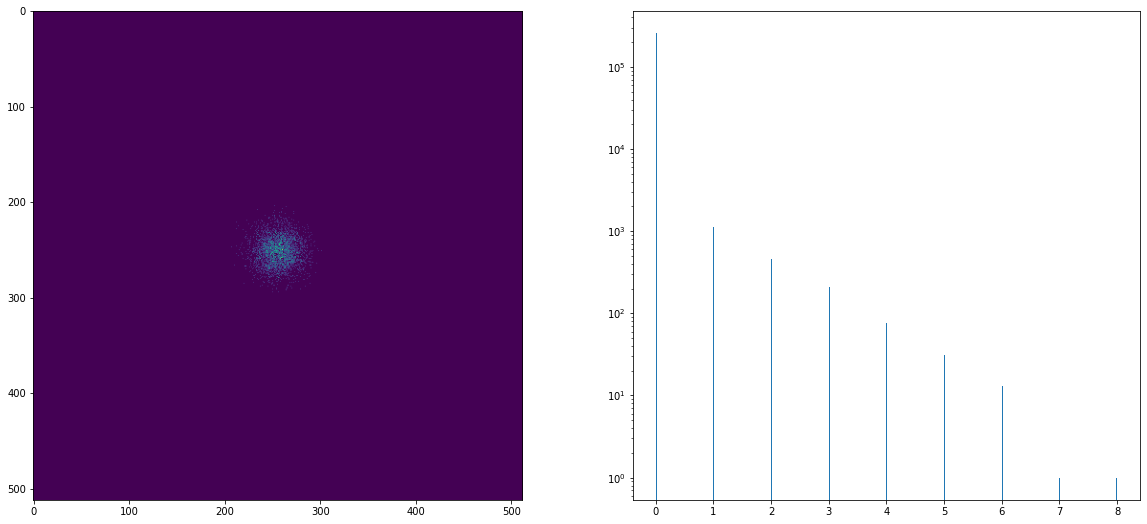

In [173]:
fig, axs = plt.subplots(1, 2, figsize = (20,9))
axs[0].imshow(p_pssn[2])
axs[1].hist(p_pssn[2].flatten(), bins = 512)
axs[1].set_yscale('log')

plt.show()

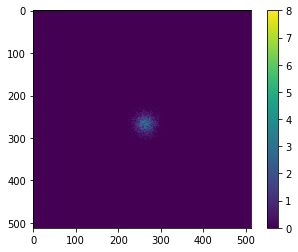

In [27]:
plt.figure()
plt.imshow(p_pssn[53])
plt.colorbar()
plt.show()

In [22]:
p_pssn = {}
for i in range(0,500):
    pssn_hits = []
    for j in p_smeared[i]:
        pssn_hits.append(np.random.poisson(j))
    pssn_hits = np.asarray(pssn_hits).reshape(512,512)
    p_pssn[i] = pssn_hits
    
# p_pssn_scaled = {}
# for i in range(0,50):
#     pssn_scaled_hits = []
#     for j in p_scaled[i]:
#         pssn_scaled_hits.append(np.random.poisson(j))
#     pssn_scaled_hits = np.asarray(pssn_scaled_hits).reshape(512,512)
#     p_pssn_scaled[i] = pssn_scaled_hits
    

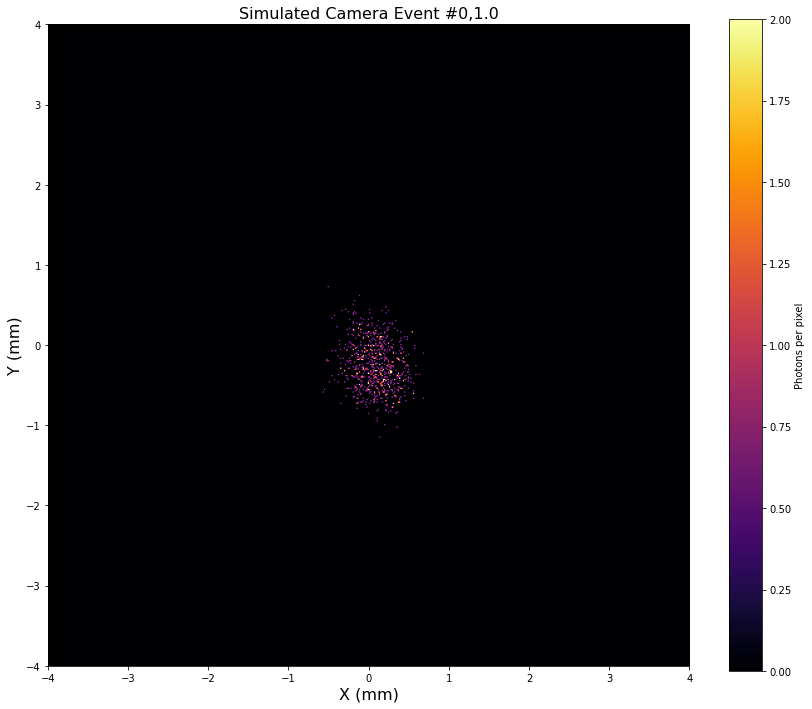

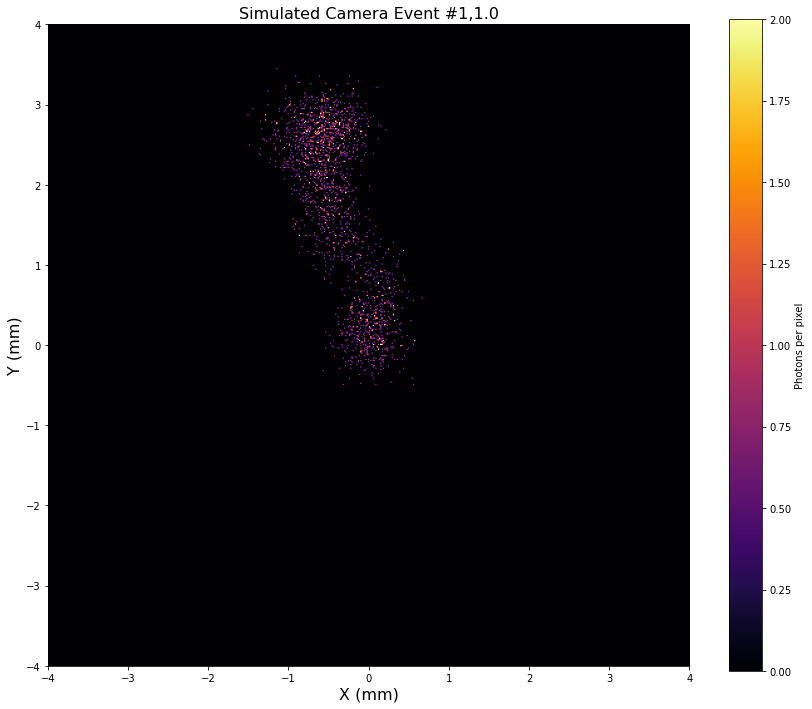

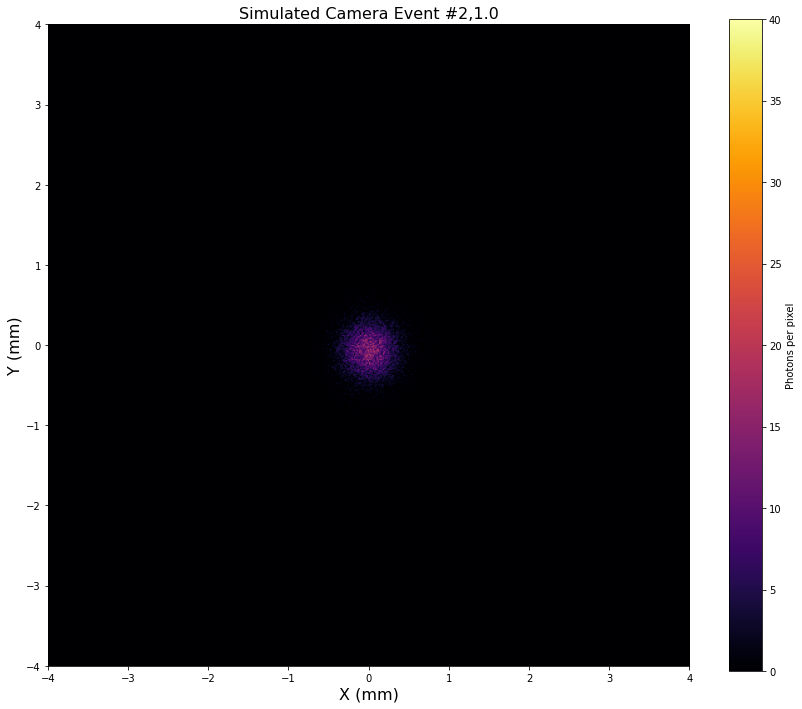

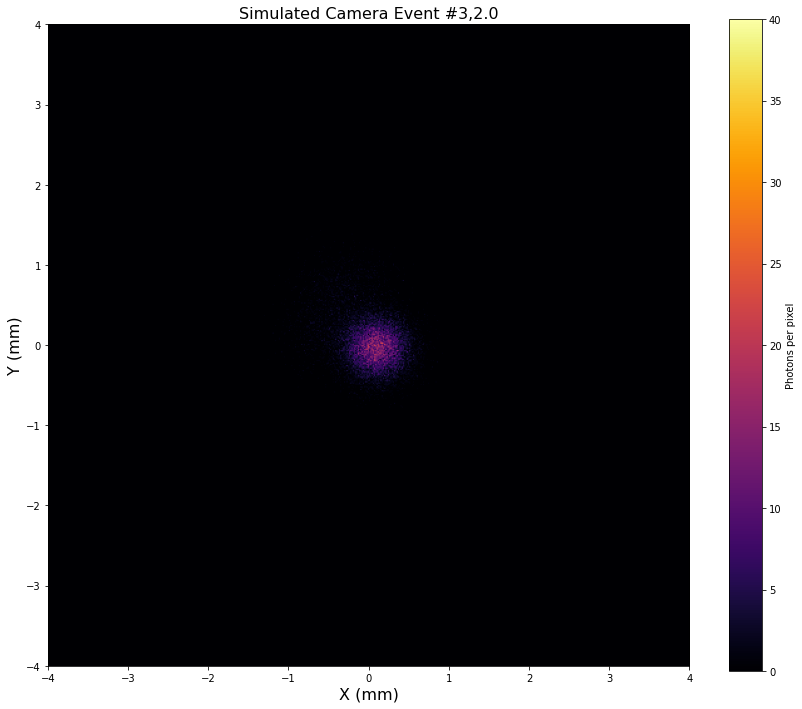

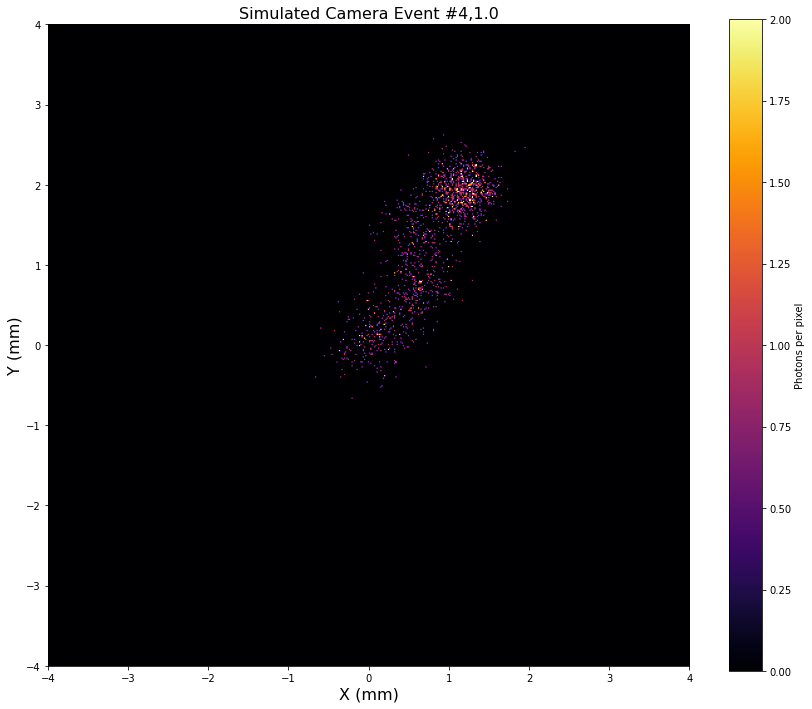

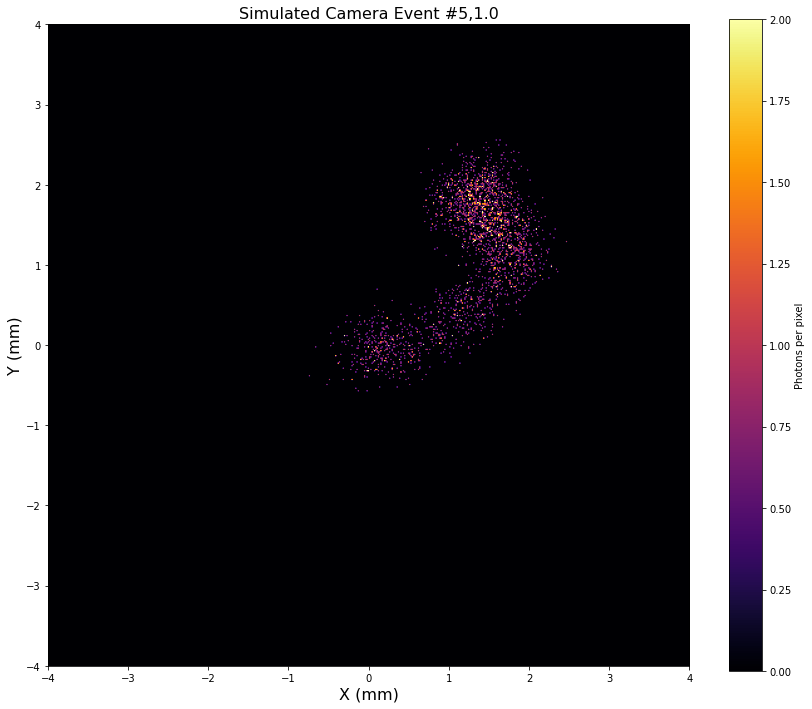

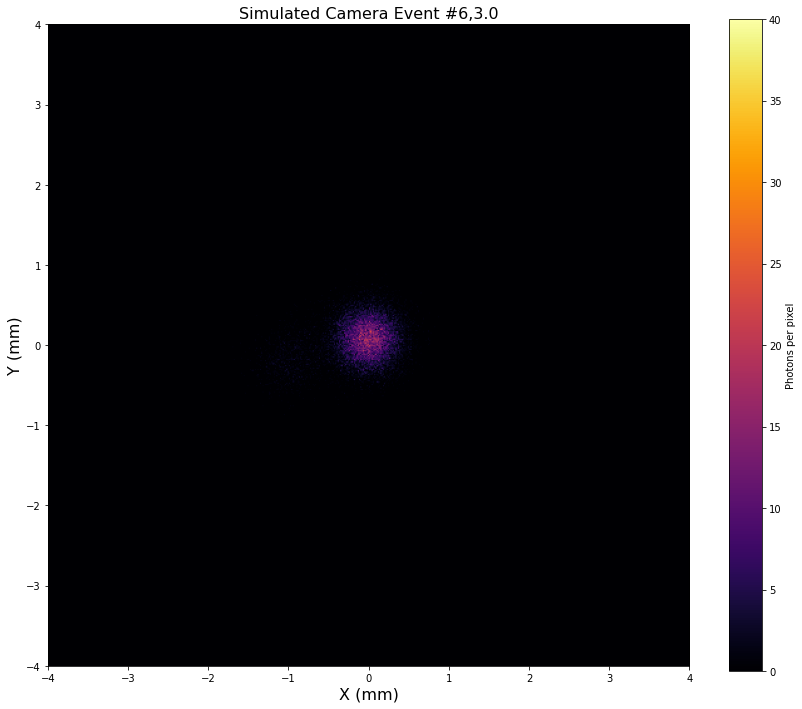

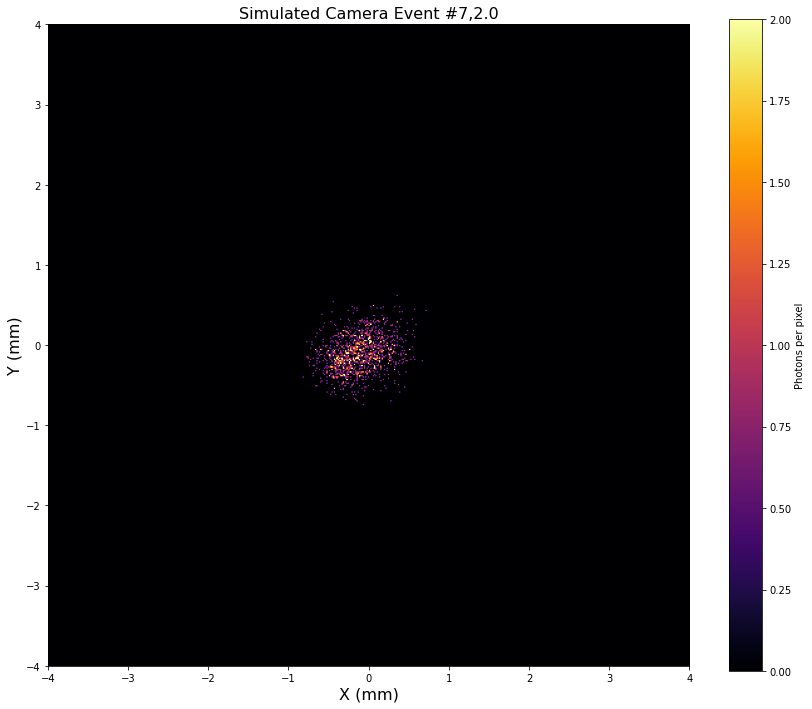

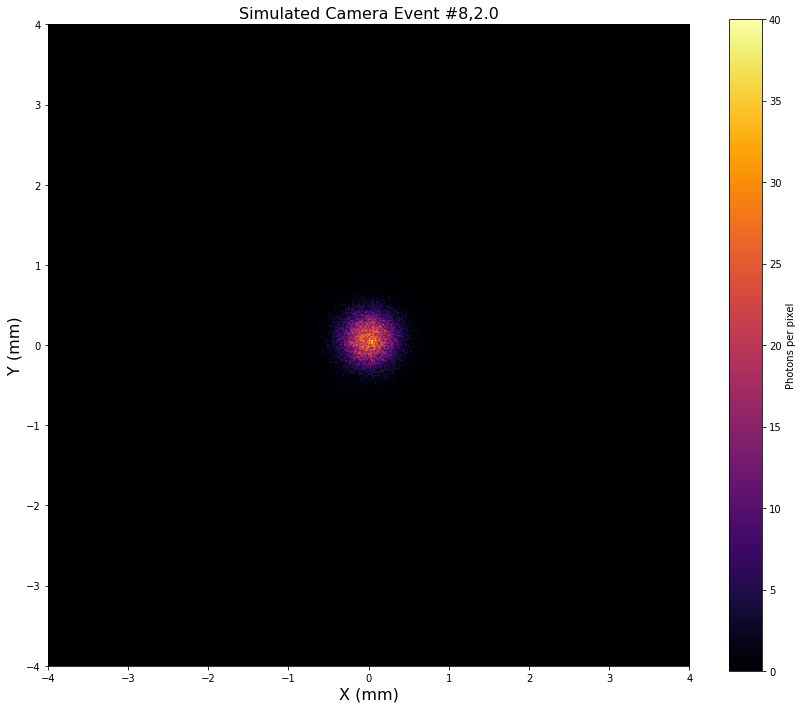

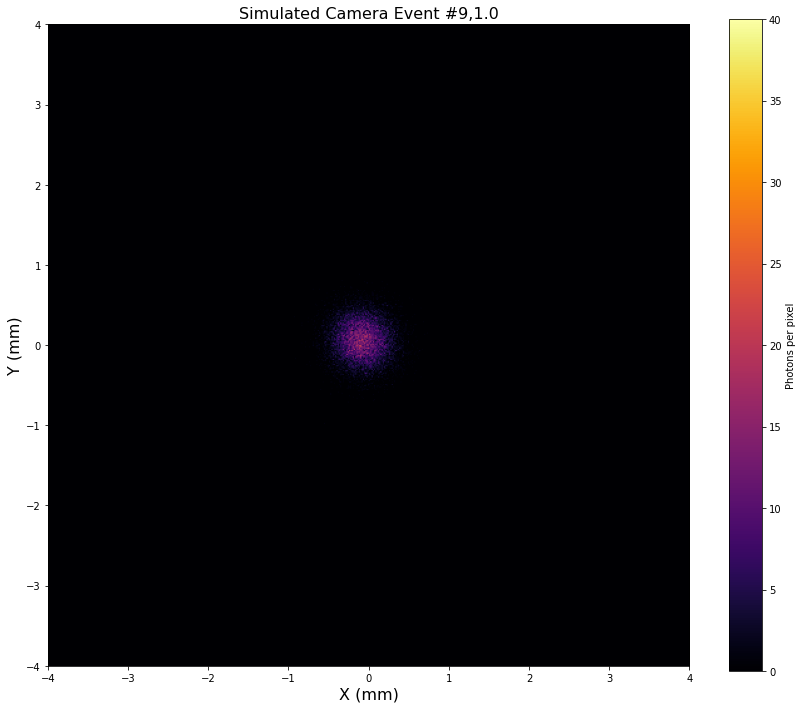

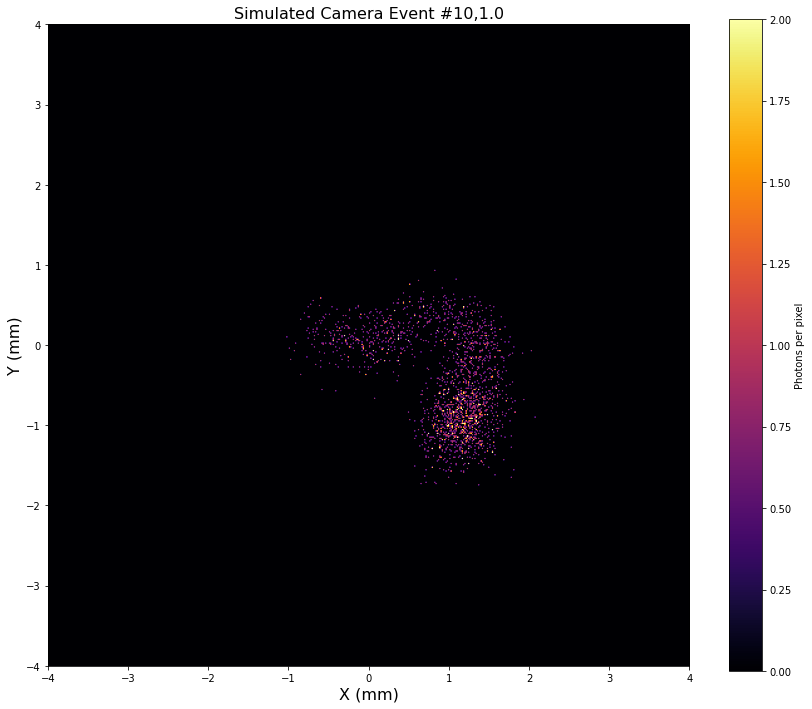

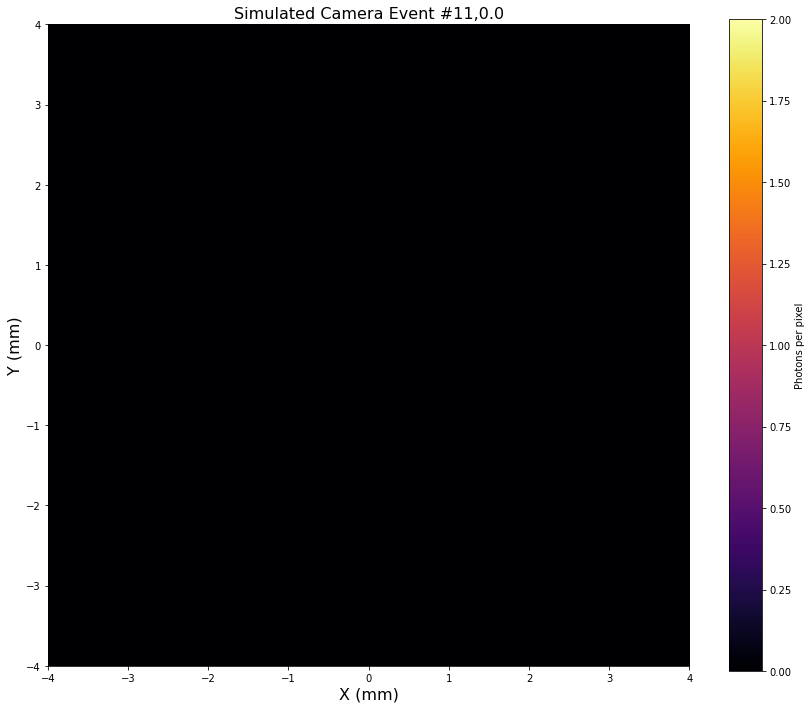

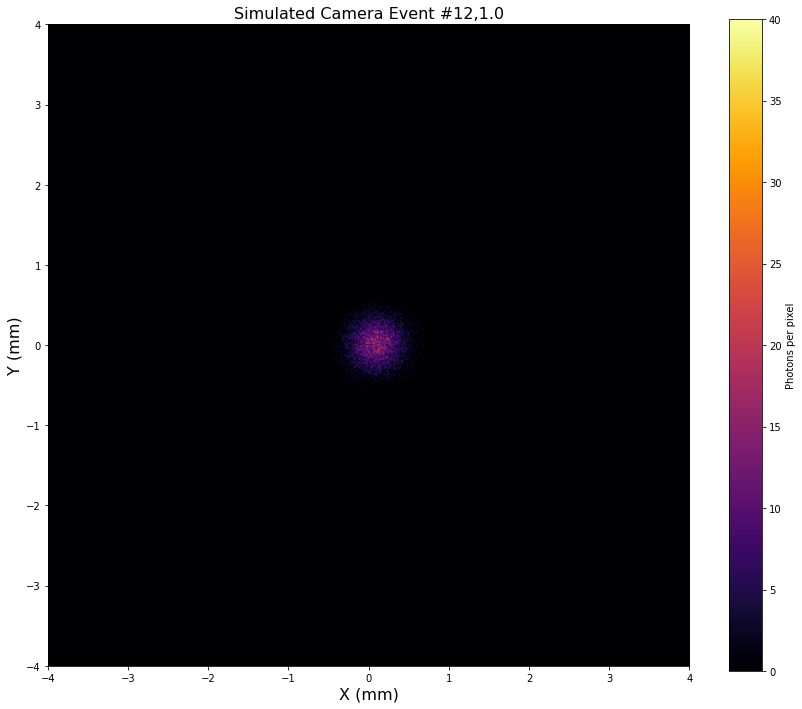

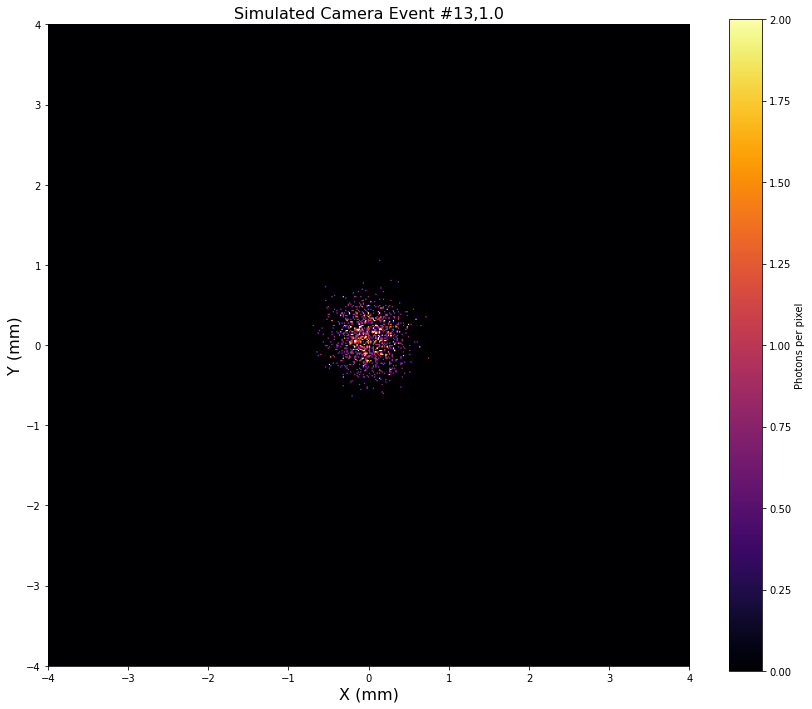

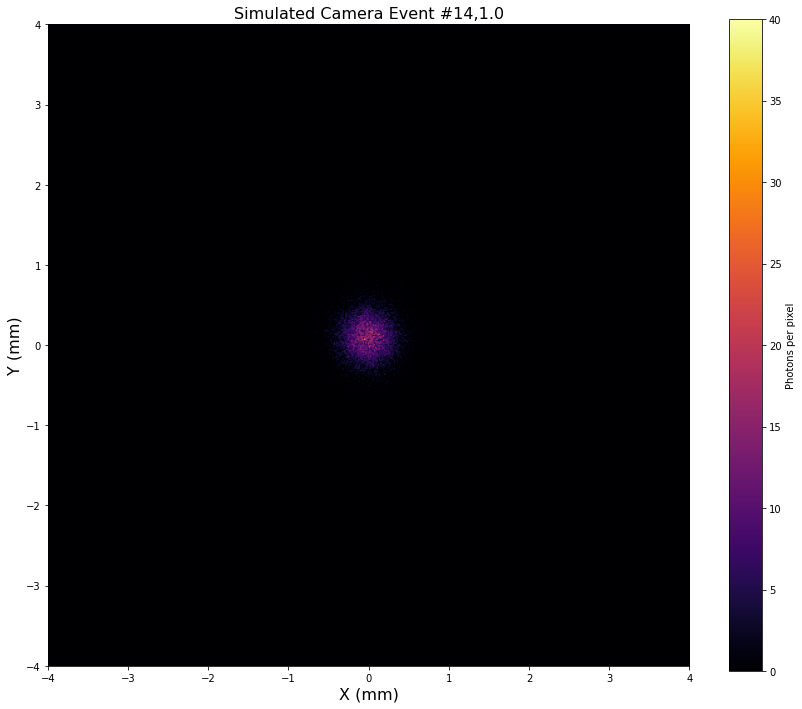

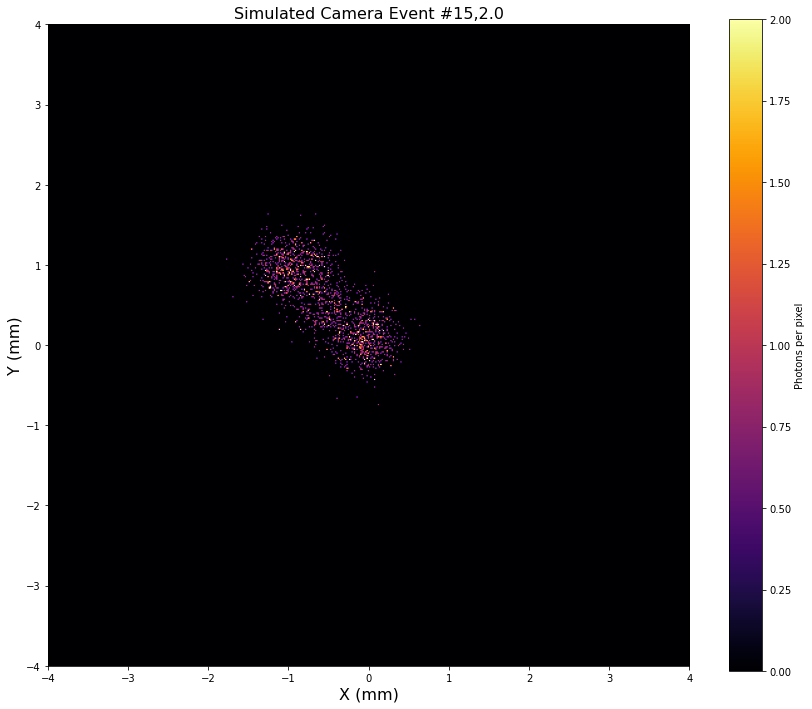

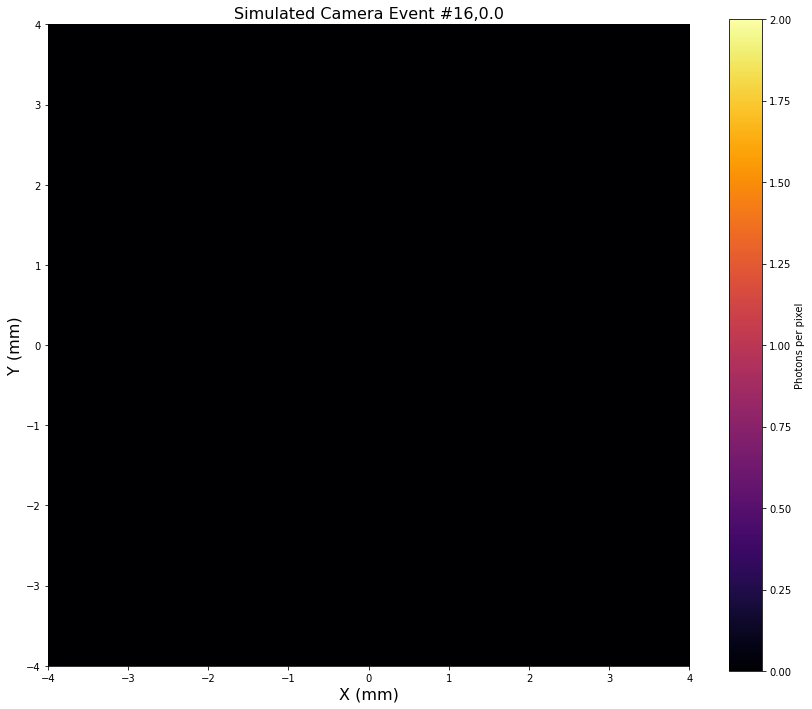

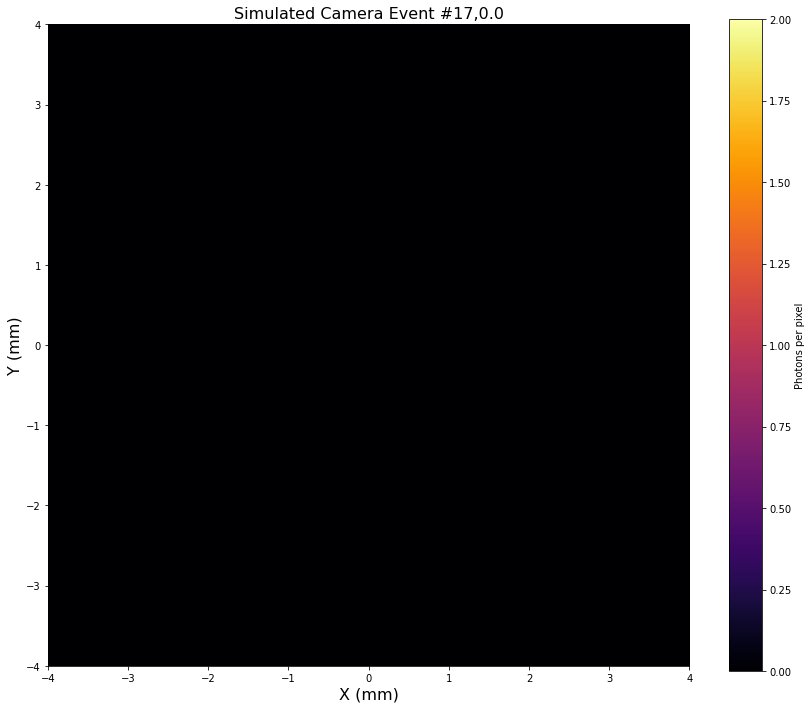

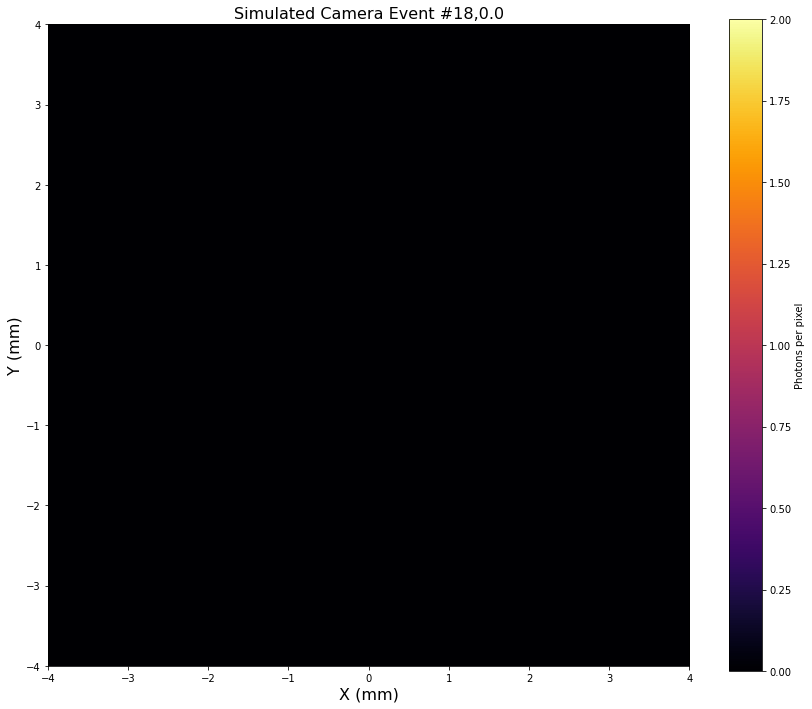

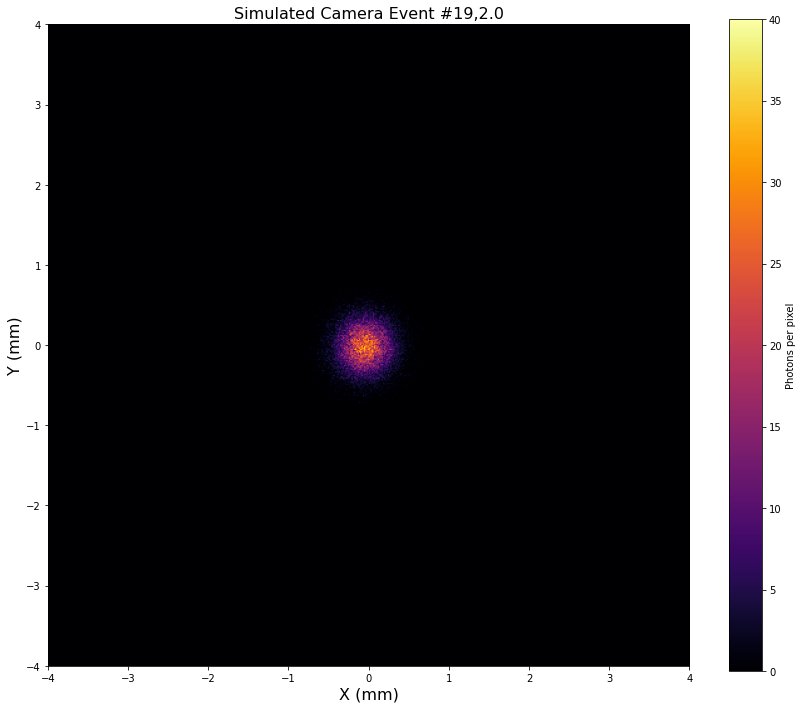

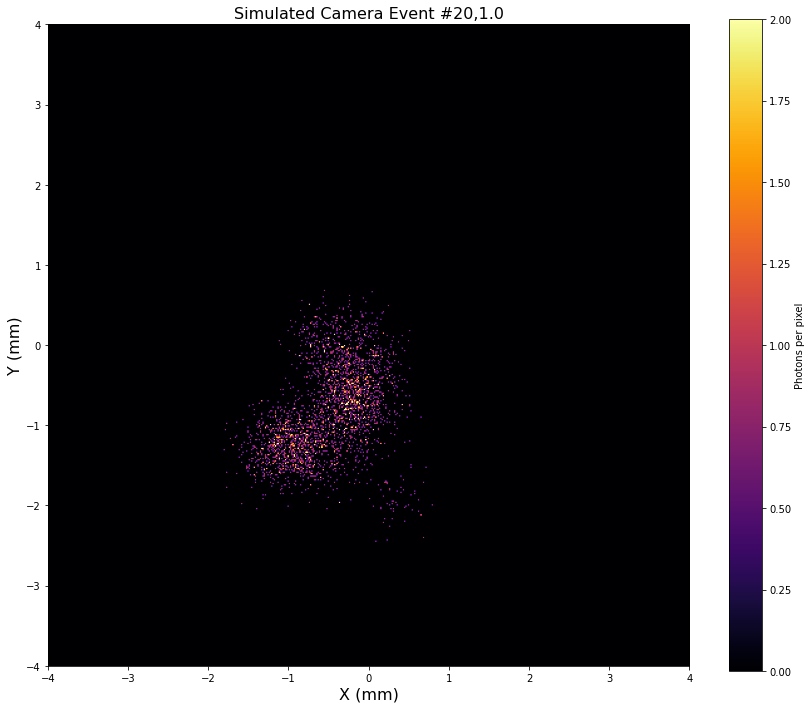

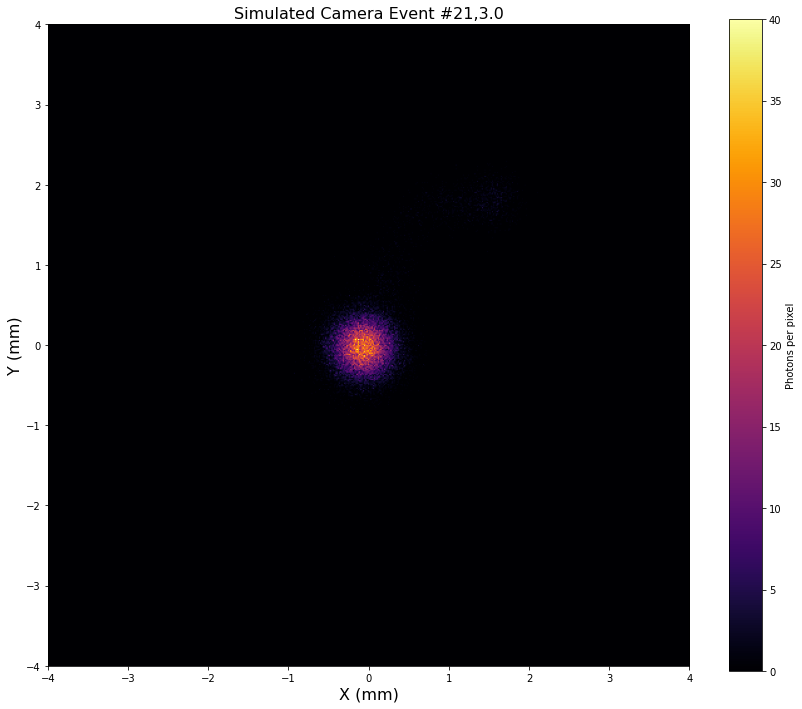

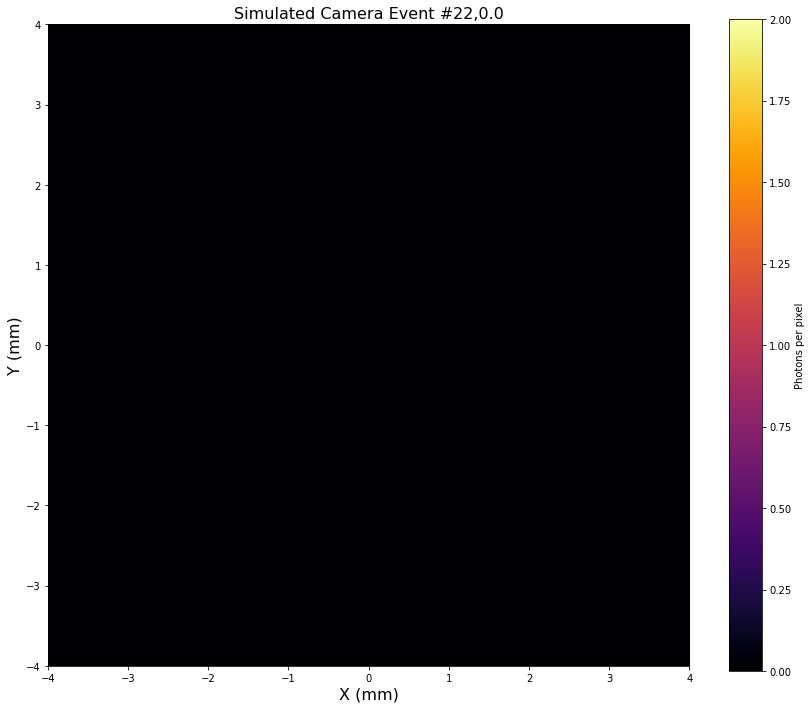

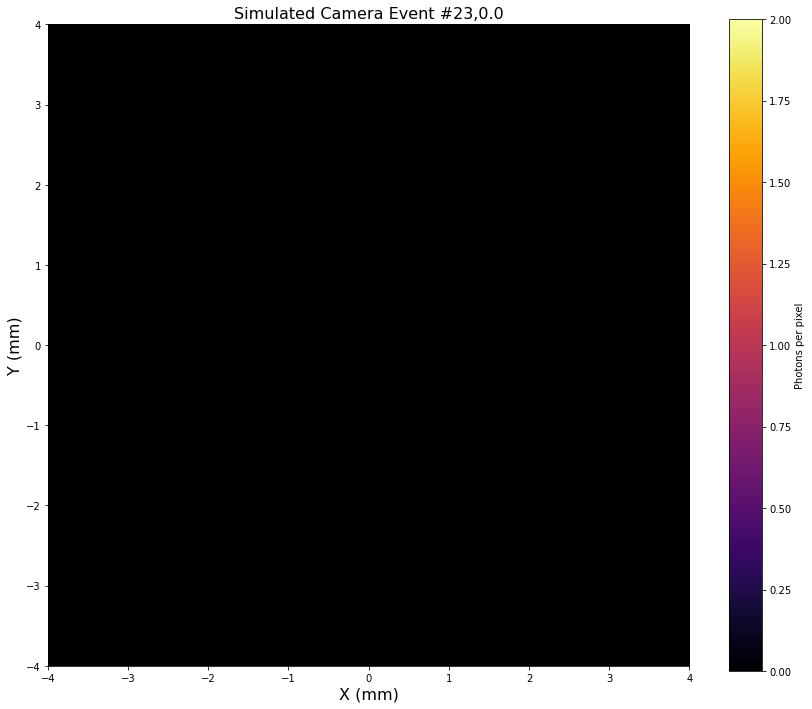

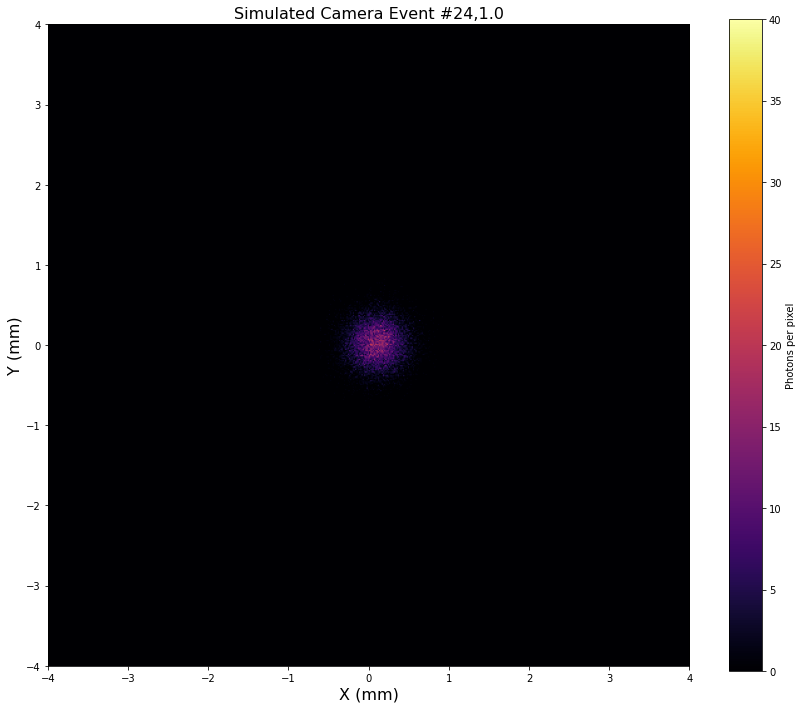

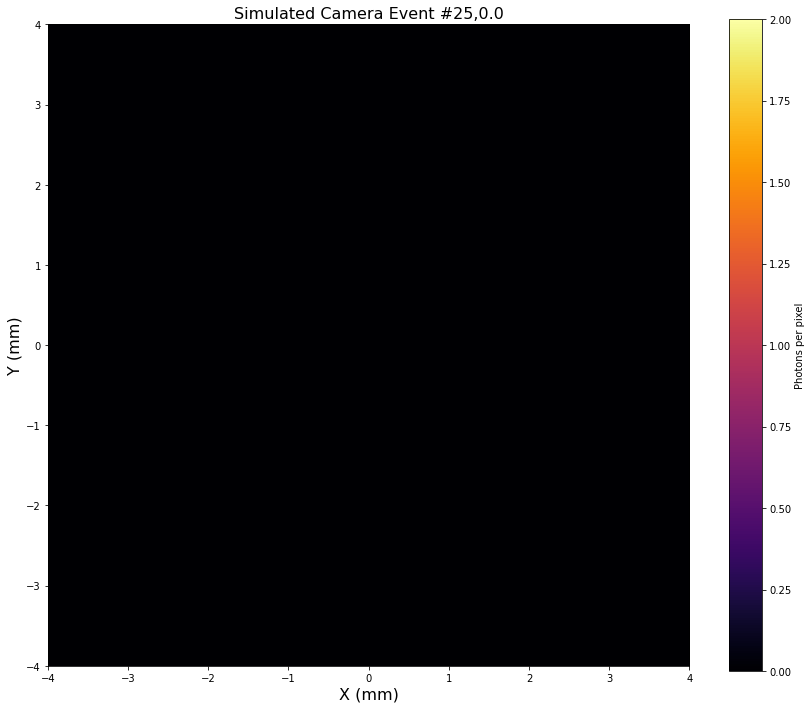

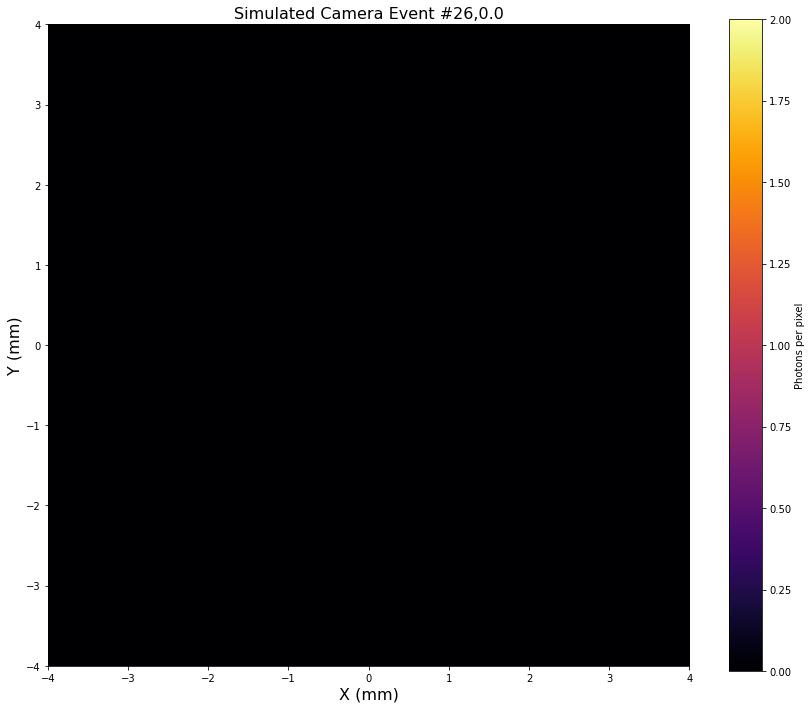

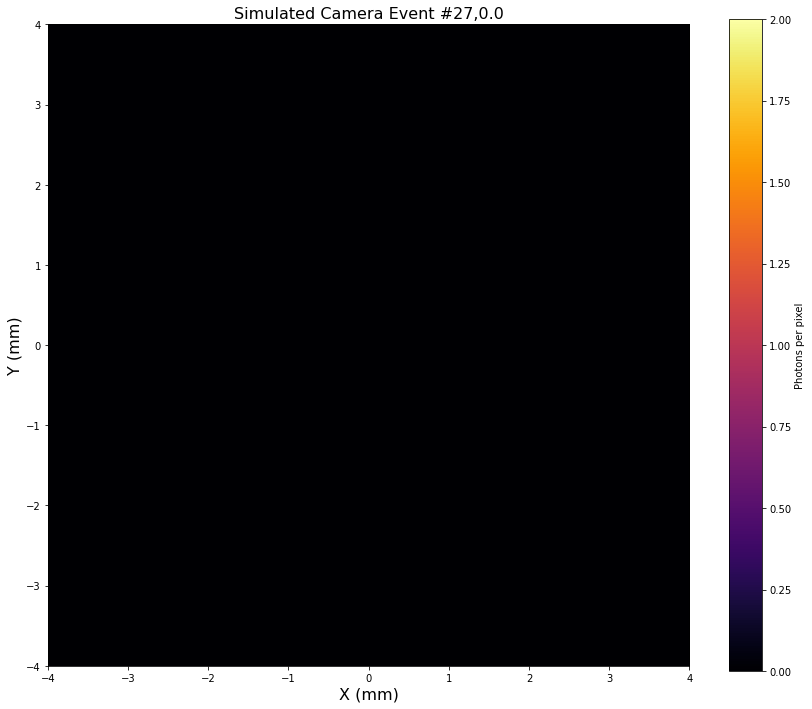

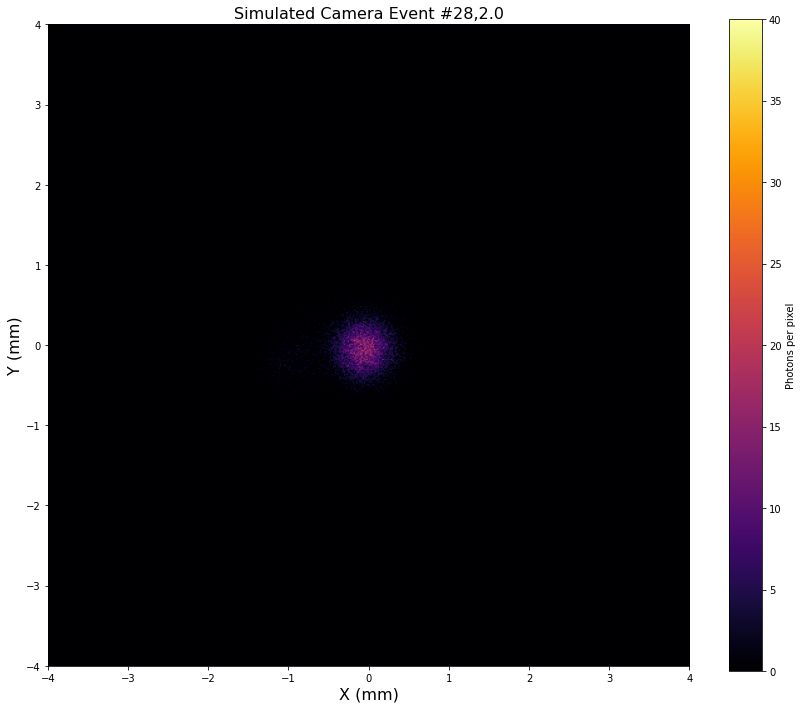

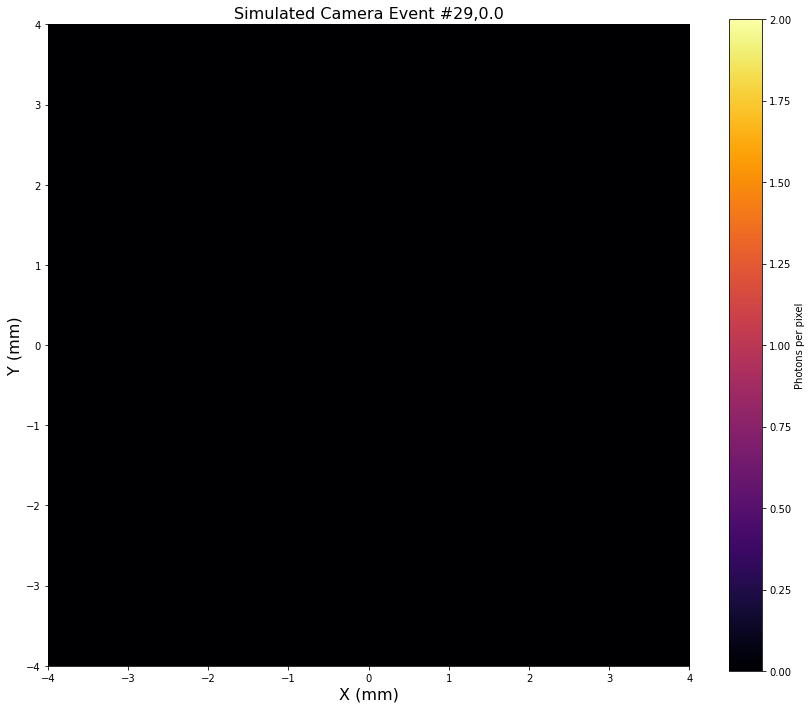

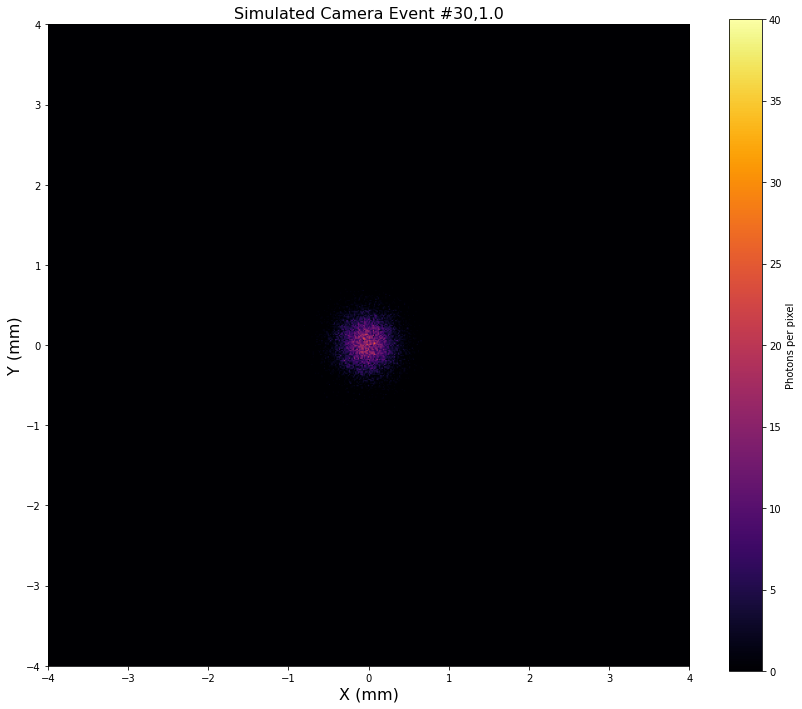

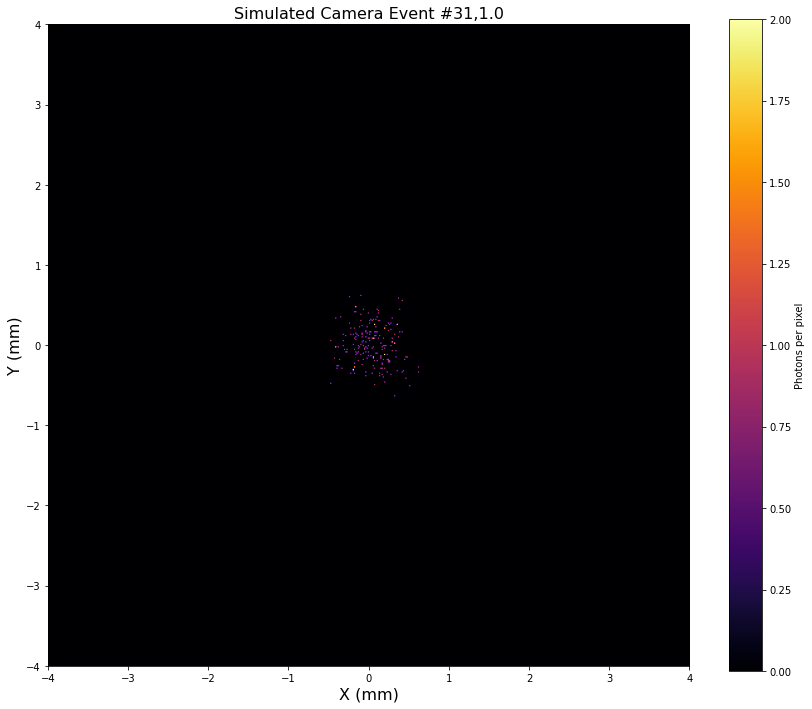

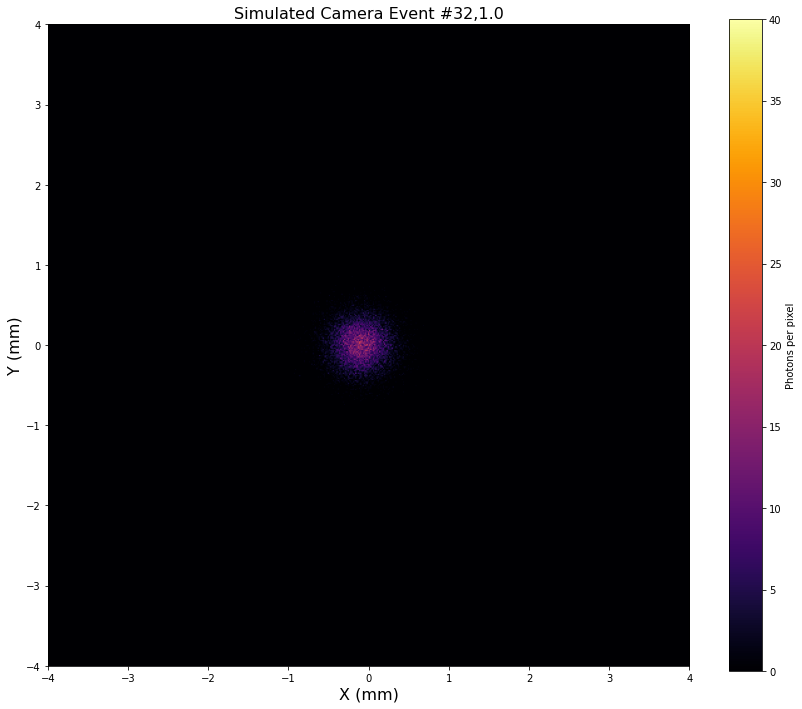

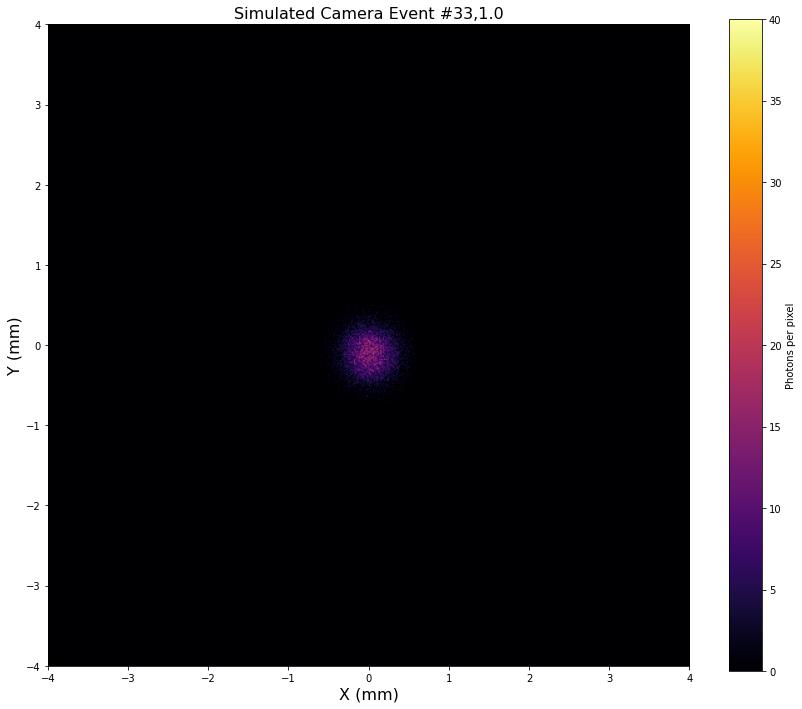

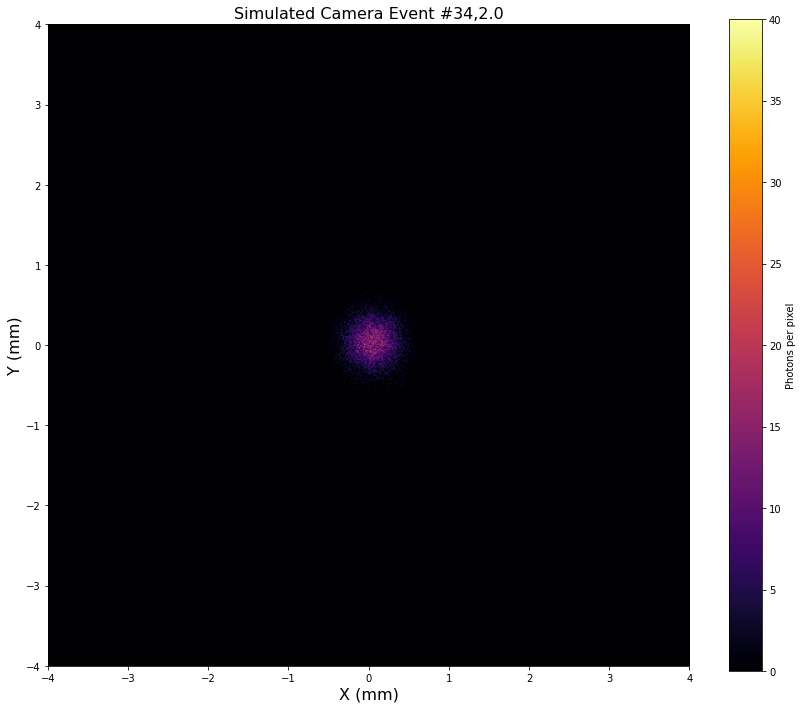

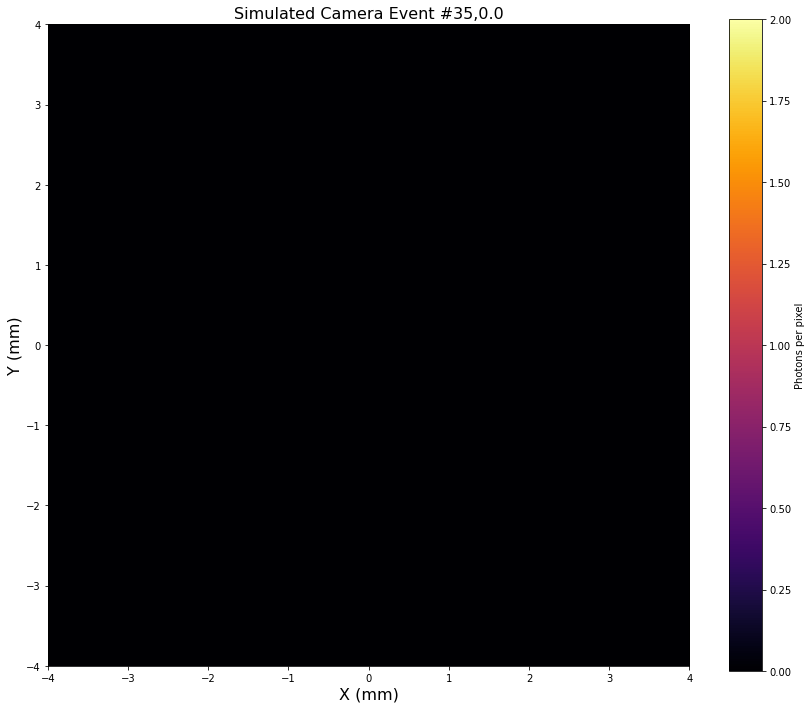

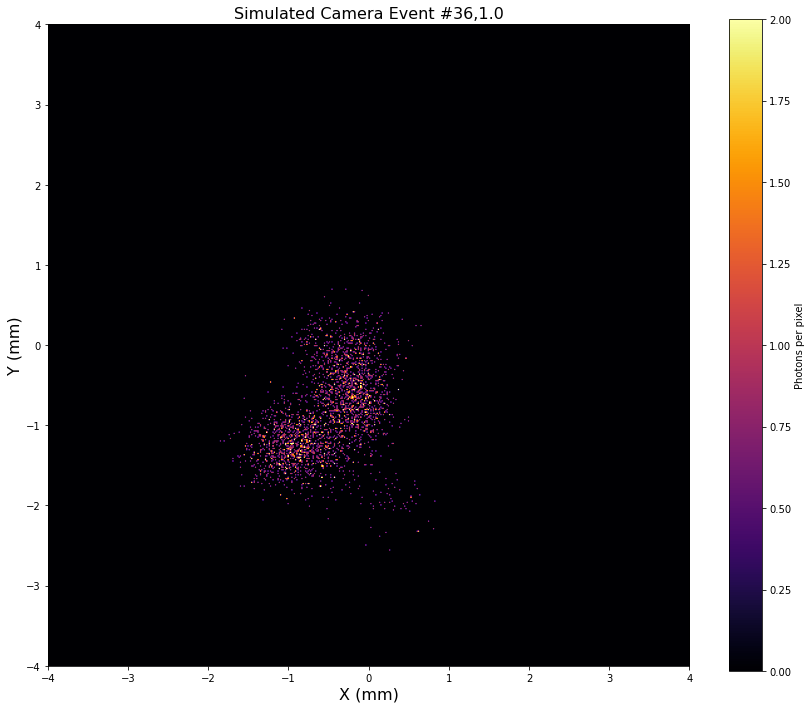

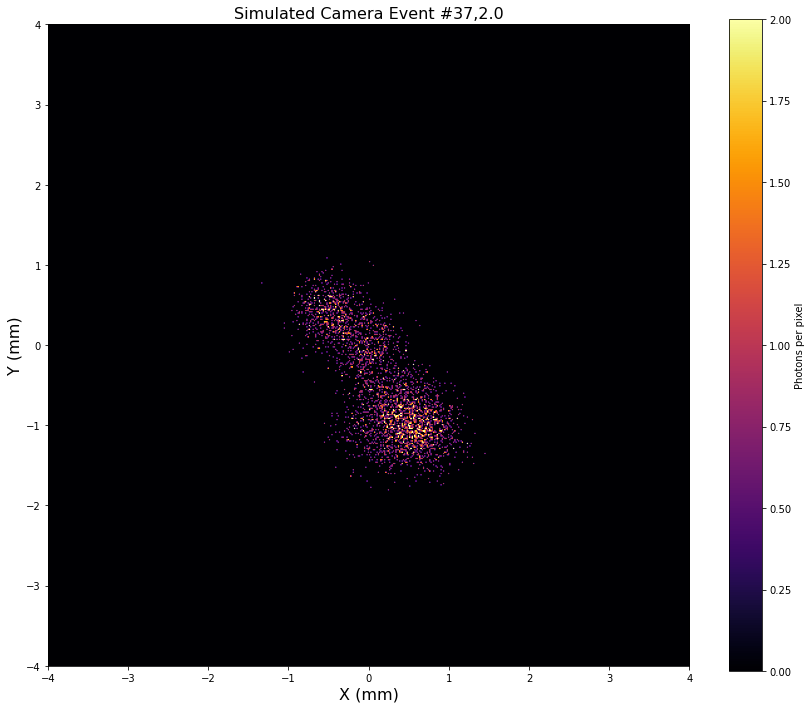

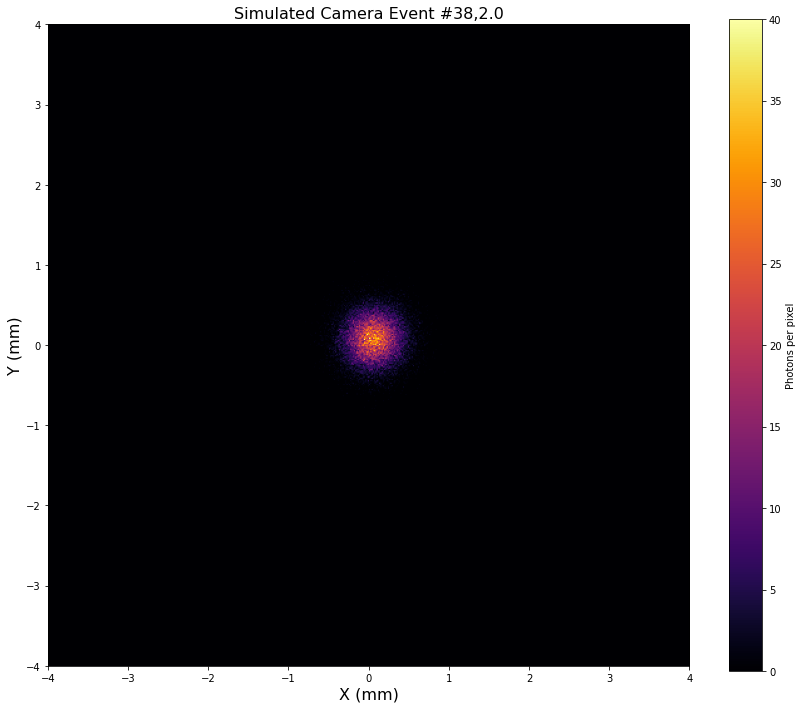

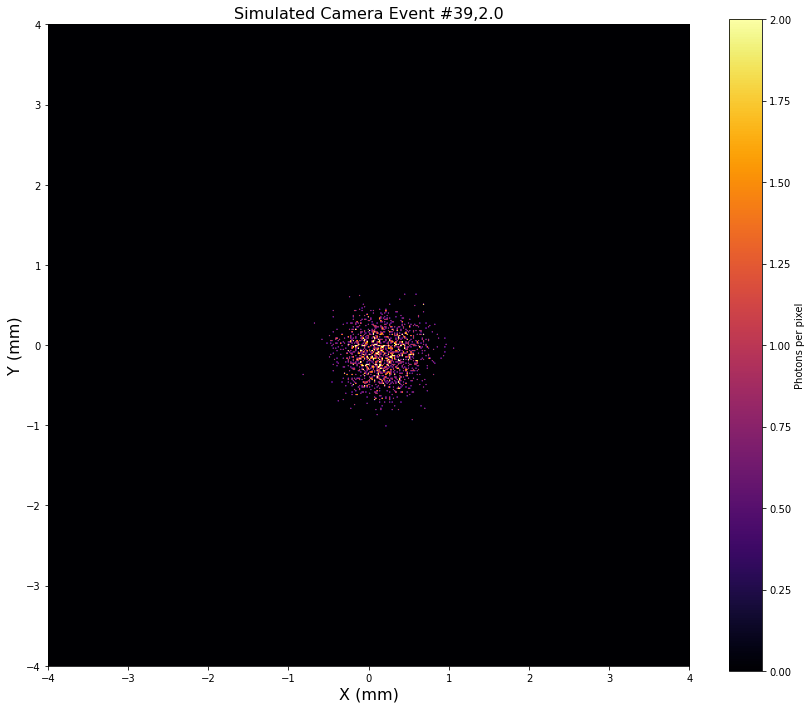

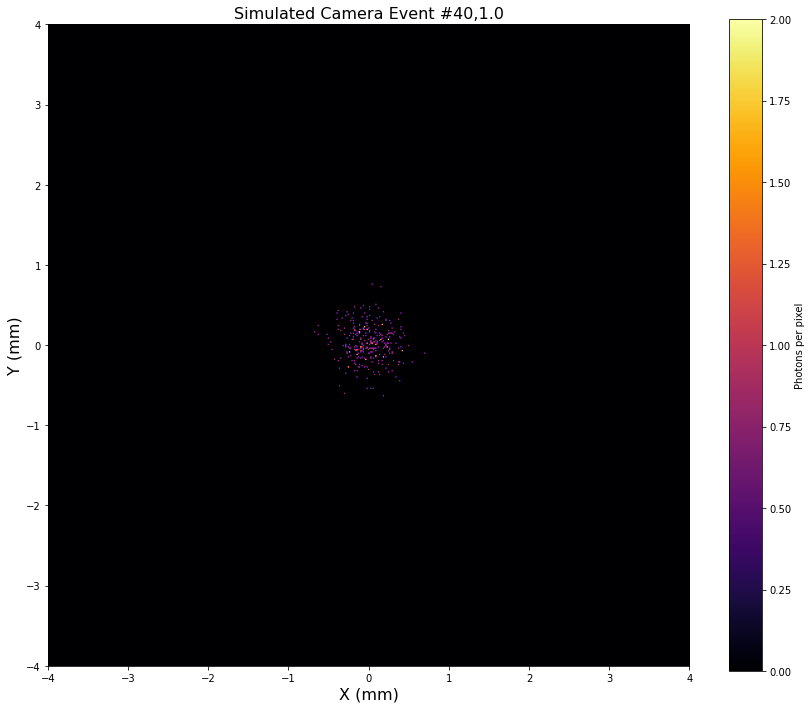

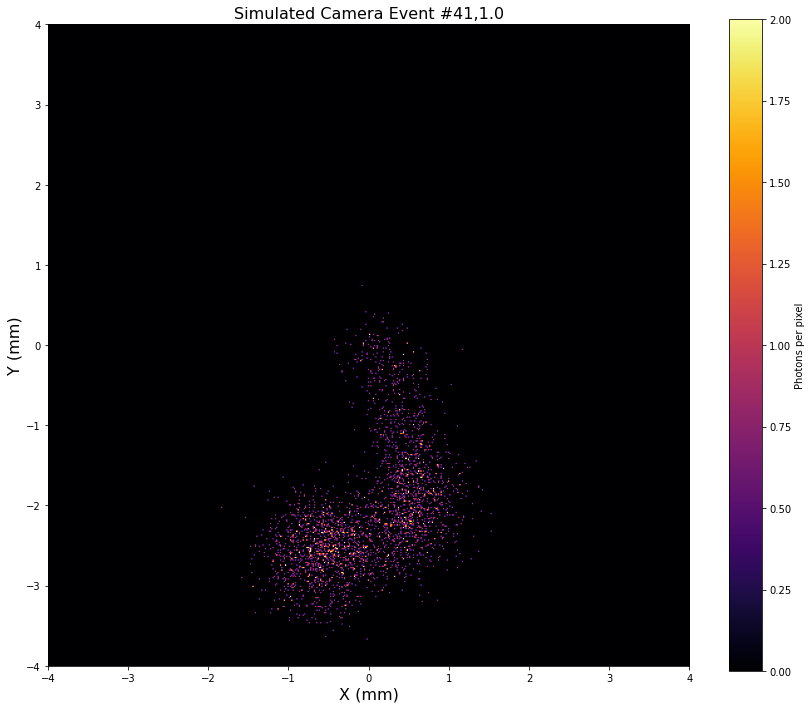

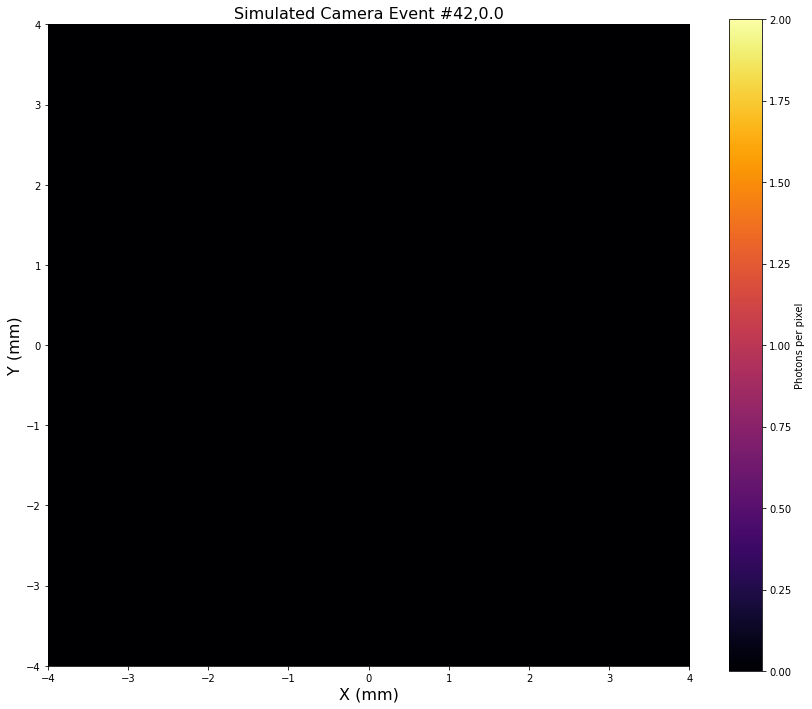

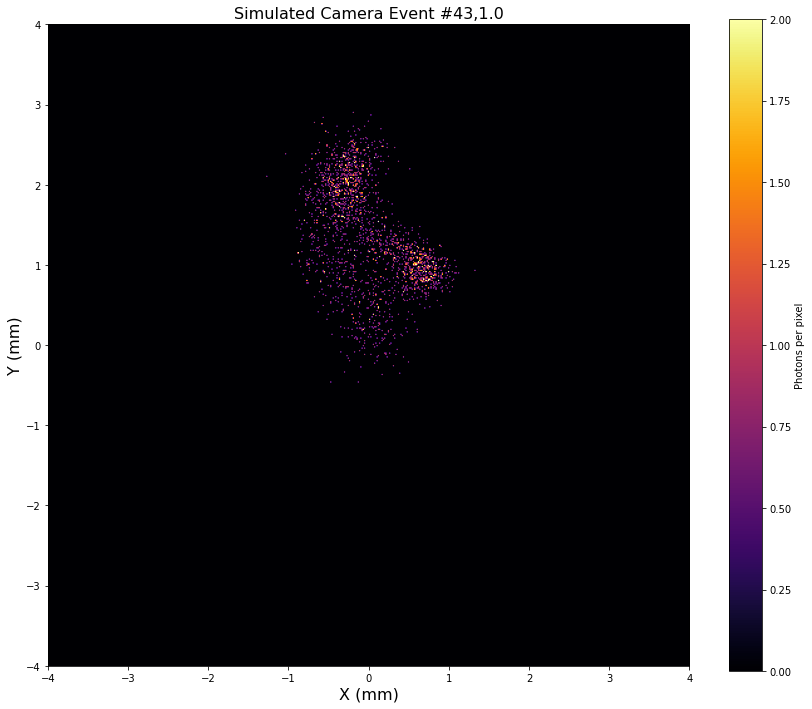

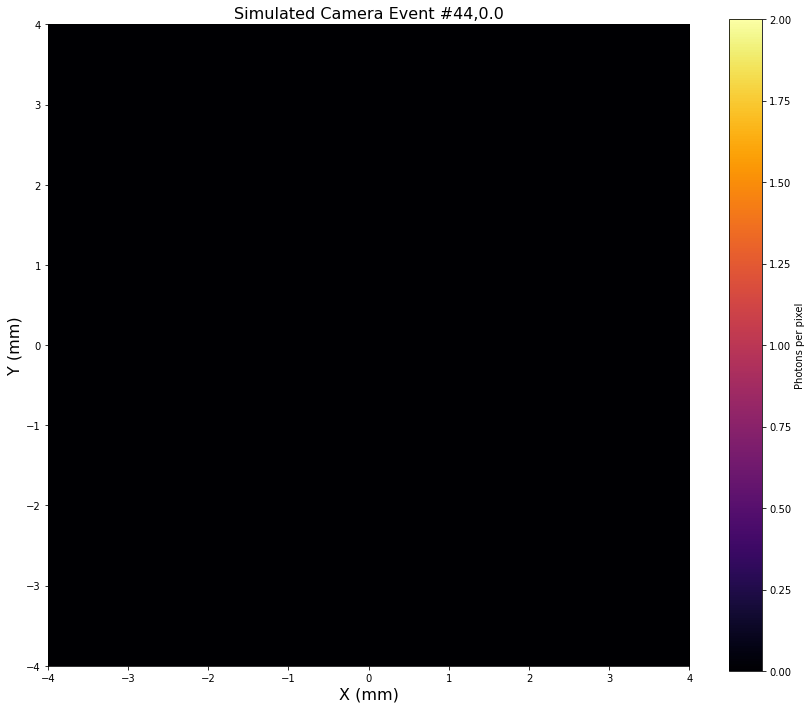

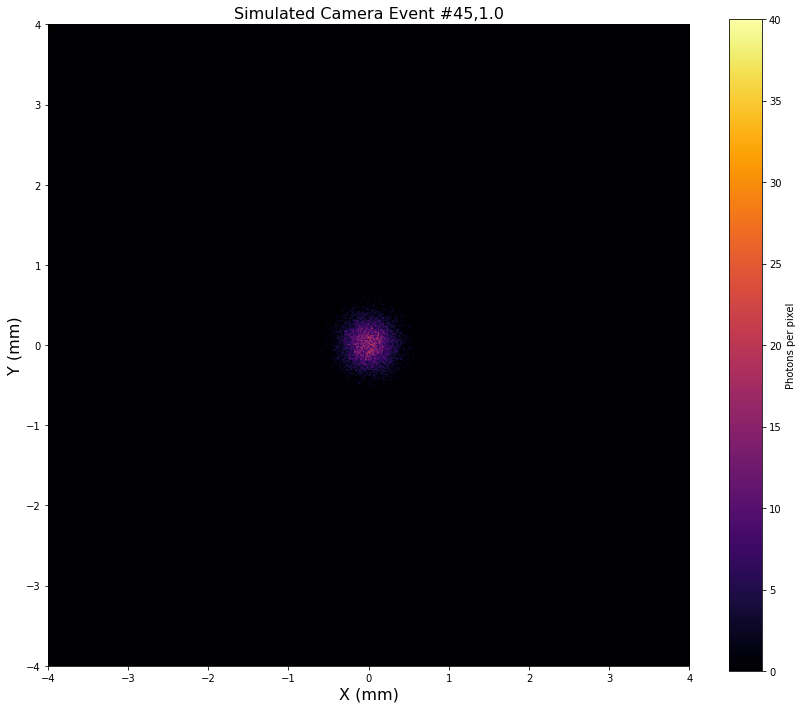

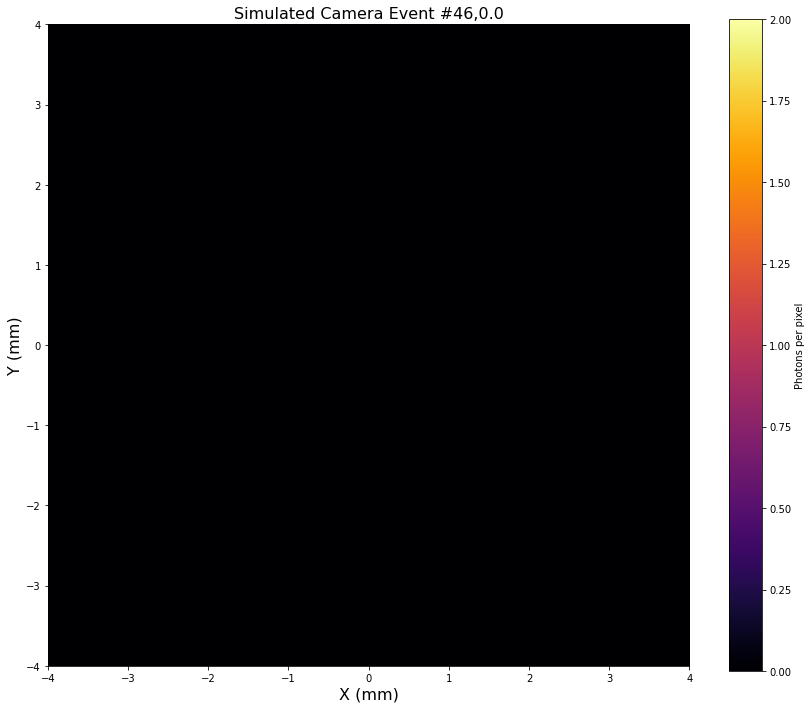

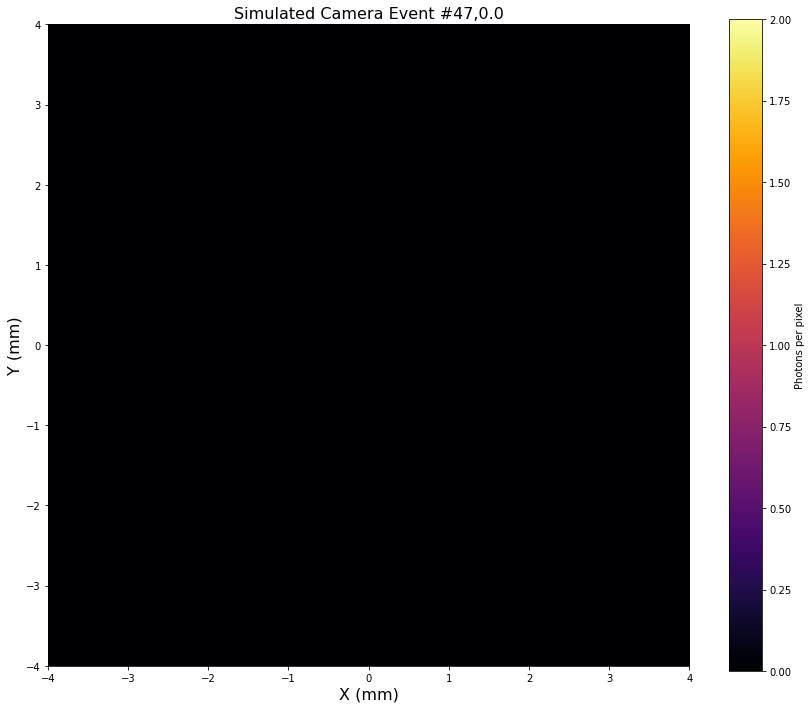

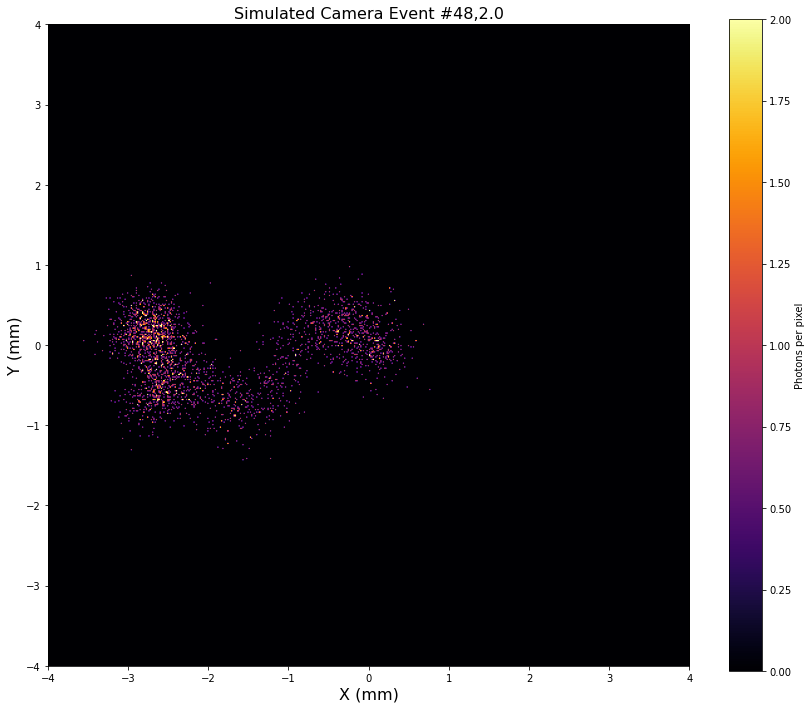

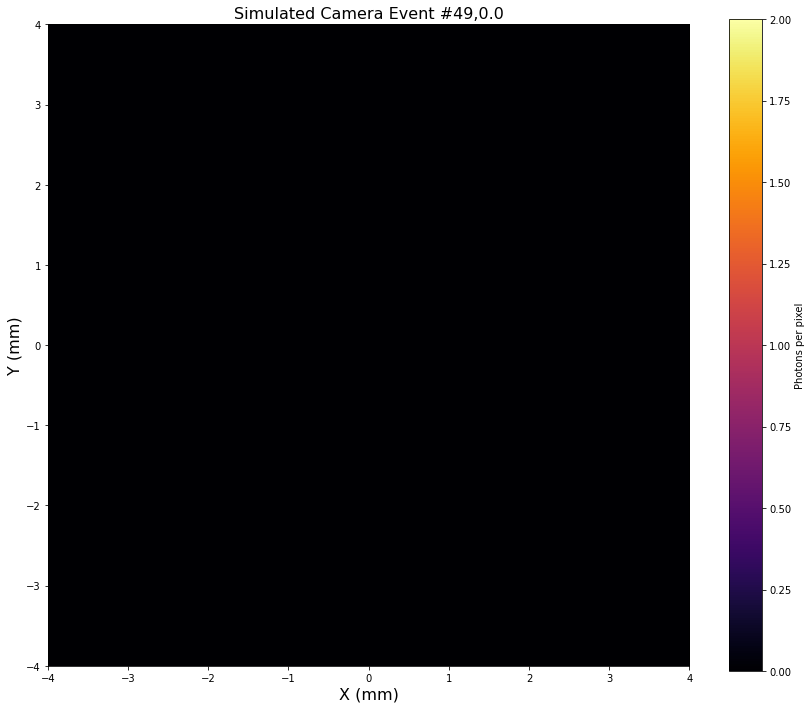

In [88]:
for i in range(0,50):
    if pileup[i] >= 0:
        fig = plt.figure(figsize = (12,10))
        # plt.ylim(-35, 15)
        # plt.xlim(-25, 15)
        if np.mean(p[i]) > 0.015: 
            im = plt.imshow((p_pssn[i]), origin='lower',
                            extent=[xedge[i][0], xedge[i][-1], yedge[i][0], yedge[i][-1]],
                            cmap = 'inferno', vmin=0, vmax=40)
            fig.colorbar(im,  label = r'Photons per pixel')
            fig.patch.set_facecolor("white")
#             plt.xlim(-50, 50)
#             plt.ylim(-50, 50)
            plt.xlabel('X (mm)', fontsize=16)
            plt.ylabel('Y (mm)', fontsize=16)
            plt.title(r'Simulated Camera Event #' + str(i) + r',' + str(pileup[i]), fontsize=16)
        #     plt.savefig('drifted_e_pb210_cam.png', dpi = 300)
            plt.tight_layout()
#             plt.savefig('/Users/byrnesnk/Documents/work/CRAB/CRAB-0 Paper/SimImages/Sim{}.png'.format(i), dpi = 300)
            # ax.set_zlabel('Z (cm)')
            plt.show()
        else:
            im = plt.imshow((p_pssn[i]), origin='lower',
                            extent=[xedge[i][0], xedge[i][-1], yedge[i][0], yedge[i][-1]],
                            cmap = 'inferno', vmin=0, vmax=2)
            fig.colorbar(im,  label = r'Photons per pixel')
            fig.patch.set_facecolor("white")
#             plt.xlim(-50, 50)
#             plt.ylim(-50, 50)
            plt.xlabel('X (mm)', fontsize=16)
            plt.ylabel('Y (mm)', fontsize=16)
            plt.title(r'Simulated Camera Event #' + str(i) + r',' + str(pileup[i]), fontsize=16)
        #     plt.savefig('drifted_e_pb210_cam.png', dpi = 300)
            plt.tight_layout()
#             plt.savefig('/Users/byrnesnk/Documents/work/CRAB/CRAB-0 Paper/SimImages/Sim{}.png'.format(i), dpi = 300)
            # ax.set_zlabel('Z (cm)')
            plt.show()

In [ ]:
for i in range(0,50):
    if pileup[i] >= 0:
        fig = plt.figure(figsize = (12,10))
        # plt.ylim(-35, 15)
        # plt.xlim(-25, 15)
        if np.mean(p_scaled[i]) > 0.015: 
            im = plt.imshow((p_pssn_scaled[i]), origin='lower',
                            extent=[xedge_scaled[i][0], xedge_scaled[i][-1], yedge_scaled[i][0], yedge_scaled[i][-1]],
                            cmap = 'inferno', vmin=0)
            fig.colorbar(im,  label = r'Photons per pixel')
            fig.patch.set_facecolor("white")
#             plt.xlim(-50, 50)
#             plt.ylim(-50, 50)
            plt.xlabel('X (mm)', fontsize=16)
            plt.ylabel('Y (mm)', fontsize=16)
            plt.title(r'Simulated Camera Event #' + str(i) + r',' + str(pileup[i]), fontsize=16)
        #     plt.savefig('drifted_e_pb210_cam.png', dpi = 300)
            plt.tight_layout()
#             plt.savefig('/Users/byrnesnk/Documents/work/CRAB/CRAB-0 Paper/SimImages/Sim{}.png'.format(i), dpi = 300)
            # ax.set_zlabel('Z (cm)')
            plt.show()
        else:
            im = plt.imshow((p_pssn_scaled[i]), origin='lower',
                            extent=[xedge_scaled[i][0], xedge_scaled[i][-1], yedge_scaled[i][0], yedge_scaled[i][-1]],
                            cmap = 'inferno', vmin=0)
            fig.colorbar(im,  label = r'Photons per pixel')
            fig.patch.set_facecolor("white")
#             plt.xlim(-50, 50)
#             plt.ylim(-50, 50)
            plt.xlabel('X (mm)', fontsize=16)
            plt.ylabel('Y (mm)', fontsize=16)
            plt.title(r'Simulated Camera Event #' + str(i) + r',' + str(pileup[i]), fontsize=16)
        #     plt.savefig('drifted_e_pb210_cam.png', dpi = 300)
            plt.tight_layout()
#             plt.savefig('/Users/byrnesnk/Documents/work/CRAB/CRAB-0 Paper/SimImages/Sim{}.png'.format(i), dpi = 300)
            # ax.set_zlabel('Z (cm)')
            plt.show()

In [23]:
pickle.dump( p_pssn, open( "/Users/byrnesnk/programming/NKB/Camera Tracks/code/sim_bunch.p", "wb" ) )
# pickle.dump( p_pssn_scaled, open( "/Users/byrnesnk/programming/NKB/Camera Tracks/code/sim_bunch_scaled.p", "wb" ) )
pickle.dump( event_truth, open( "/Users/byrnesnk/programming/NKB/Camera Tracks/code/event_truth.p", "wb" ) )

In [273]:
# hits[0] = pd.DataFrame(np.array(h5py.File('Pb210_2mm_100000.sim.h5')['MC']['hits']))
particles1 = pd.DataFrame(np.array(h5py.File('Pb210_2mm_100005.sim.h5')['MC']['particles']))
# particles2 = pd.DataFrame(np.array(h5py.File('Pb210_2mm_100004.sim.h5')['MC']['particles']))
# particles3 = pd.DataFrame(np.array(h5py.File('Pb210_2mm_100003.sim.h5')['MC']['particles']))
# particles4 = pd.DataFrame(np.array(h5py.File('Pb210_2mm_100002.sim.h5')['MC']['particles']))
# particles6 = pd.DataFrame(np.array(h5py.File('Pb210_2mm_100006.sim.h5')['MC']['particles']))

# particles['name'] = pd.DataFrame(np.array(h5py.File('Pb210_2mm_100005.sim.h5')['MC']['particles']['particle_name']))

In [274]:
# hits[1] = pd.DataFrame(np.array(h5py.File('Pb210_2mm_100001.sim.h5')['MC']['hits']))
hits1 = pd.DataFrame(np.array(h5py.File('Pb210_2mm_100005.sim.h5')['MC']['hits']))

In [275]:
# hits1[(hits1['particle_id'] == 2278 )]

hits1_x = hits1[(hits1['particle_id'] == 2278 )]['x']
hits1_y = hits1[(hits1['particle_id'] == 2278 )]['y']
hits1_z = hits1[(hits1['particle_id'] == 2278 )]['z']


xhits1_ii = []
yhits1_ii = []
zhits1_ii = []
for i in hits1_x:
    xhits1_ii.append(i*0.25)
for i in hits1_y:
    yhits1_ii.append(i*0.25)
for i in hits1_z:
    zhits1_ii.append(i*0.25)
    
xhits1_cam = []
yhits1_cam = []
zhits1_cam = []
for i in xhits1_ii:
    xhits1_cam.append(i*0.33)
for i in yhits1_ii:
    yhits1_cam.append(i*0.33)
for i in zhits1_ii:
    zhits1_cam.append(i*0.33)


In [27]:
len(x) * (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2) * (100 * 0.7 * 10) * 0.2

1922.5199263441218

In [10]:
x_a = particles[(particles['initial_t'] >= 1 )&(particles['particle_name'] == b'ie-' )]['final_x']
y_a = particles[(particles['initial_t'] >= 1 )&(particles['particle_name'] == b'ie-' )]['final_y']

In [276]:
x1 = particles1[(particles1['mother_id'] == 2278)&(particles1['particle_name'] == b'ie-' )]['final_x']
y1 = particles1[(particles1['mother_id'] == 2278)&(particles1['particle_name'] == b'ie-' )]['final_y']

# x2 = particles2[(particles2['initial_t'] < 1e+14 )&(particles2['particle_name'] == b'ie-' )]['final_x']
# y2 = particles2[(particles2['initial_t'] < 1e+14 )&(particles2['particle_name'] == b'ie-' )]['final_y']

# x3 = particles3[(particles3['initial_t'] < 1e+14 )&(particles3['particle_name'] == b'ie-' )]['final_x']
# y3 = particles3[(particles3['initial_t'] < 1e+14 )&(particles3['particle_name'] == b'ie-' )]['final_y']

# x4 = particles4[(particles4['initial_t'] < 1e+14 )&(particles4['particle_name'] == b'ie-' )]['final_x']
# y4 = particles4[(particles4['initial_t'] < 1e+14 )&(particles4['particle_name'] == b'ie-' )]['final_y']

# x6 = particles6[(particles6['initial_t'] < 1e+14 )&(particles6['particle_name'] == b'ie-' )]['final_x']
# y6 = particles6[(particles6['initial_t'] < 1e+14 )&(particles6['particle_name'] == b'ie-' )]['final_y']

# x5 = particles5[(particles5['particle_name'] == b'ie-' )]['final_x']
# y5 = particles5[(particles5['particle_name'] == b'ie-' )]['final_y']

In [370]:
print (y6)

1       9.092732
2       2.869408
3       0.452353
4      -3.251847
5       0.294700
          ...   
2443    2.995575
2444    2.819075
2445    1.042141
2446    4.090900
2447    3.541369
Name: final_y, Length: 2432, dtype: float32


In [277]:
x1_ii = []
y1_ii = []
for i in x1:
    x1_ii.append(i*0.25)
for i in y1:
    y1_ii.append(i*0.25)
    
# x2_ii = []
# y2_ii = []
# for i in x2:
#     x2_ii.append(i*0.25)
# for i in y2:
#     y2_ii.append(i*0.25)
    
# x3_ii = []
# y3_ii = []
# for i in x3:
#     x3_ii.append(i*0.25)
# for i in y3:
#     y3_ii.append(i*0.25)
    
# x4_ii = []
# y4_ii = []
# for i in x4:
#     x4_ii.append(i*0.25)
# for i in y4:
#     y4_ii.append(i*0.25)

# x5_ii = []
# y5_ii = []
# for i in x5:
#     x5_ii.append(i*0.25)
# for i in y5:
#     y5_ii.append(i*0.25)

# x6_ii = []
# y6_ii = []
# for i in x6:
#     x6_ii.append(i*0.25)
# for i in y6:
#     y6_ii.append(i*0.25)
    
x1_cam = []
y1_cam = []
for i in x1_ii:
    x1_cam.append(i*0.33)
for i in y1_ii:
    y1_cam.append(i*0.33)
    
# x2_cam = []
# y2_cam = []
# for i in x2_ii:
#     x2_cam.append(i*0.33)
# for i in y2_ii:
#     y2_cam.append(i*0.33)
    
# x3_cam = []
# y3_cam = []
# for i in x3_ii:
#     x3_cam.append(i*0.33)
# for i in y3_ii:
#     y3_cam.append(i*0.33)
    
# x4_cam = []
# y4_cam = []
# for i in x4_ii:
#     x4_cam.append(i*0.33)
# for i in y4_ii:
#     y4_cam.append(i*0.33)

# # x5_cam = []
# # y5_cam = []
# # for i in x5_ii:
# #     x5_cam.append(i*0.33)
# # for i in y5_ii:
# #     y5_cam.append(i*0.33)

# x6_cam = []
# y6_cam = []
# for i in x6_ii:
#     x6_cam.append(i*0.33)
# for i in y6_ii:
#     y6_cam.append(i*0.33)

In [279]:
print (np.max)

[0.03477408 0.03477408 0.03477408 ... 0.03477408 0.03477408 0.03477408]


In [278]:
image_weights1 = np.ones(len(x1)) * (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2) * (100 * 0.7 * 10) #* 3000 * 0.2
# image_weights2 = np.ones(len(x2)) * (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2) * (100 * 0.7 * 10) #* 3000 * 0.2
# image_weights3 = np.ones(len(x3)) * (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2) * (100 * 0.7 * 10) #* 3000 * 0.2
# image_weights4 = np.ones(len(x4)) * (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2) * (100 * 0.7 * 10) #* 3000 * 0.2
# image_weights6 = np.ones(len(x6)) * (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2) * (100 * 0.7 * 10) #* 3000 * 0.2



# image_weights_a = np.ones(len(x_a)) * (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2) * (100 * 0.7 * 10) #* 3000 * 0.2
# print (image_weights)



In [15]:
fig = plt.figure(figsize = (10,8))
# plt.ylim(-35, 15)
# plt.xlim(-25, 15)
p = plt.hist2d(x1_ii, y1_ii, bins = 512, cmap = newcmp, range=np.array([(-55.0, 55.0), (-55.0, 55.0)]), 
               weights = image_weights)
fig.colorbar(p[3])
fig.patch.set_facecolor("white")
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.savefig('drifted_e_pb210.png', dpi = 300)
plt.tight_layout()

# ax.set_zlabel('Z (cm)')
plt.show()

NameError: name 'x' is not defined

<Figure size 720x576 with 0 Axes>

NameError: name 'n' is not defined

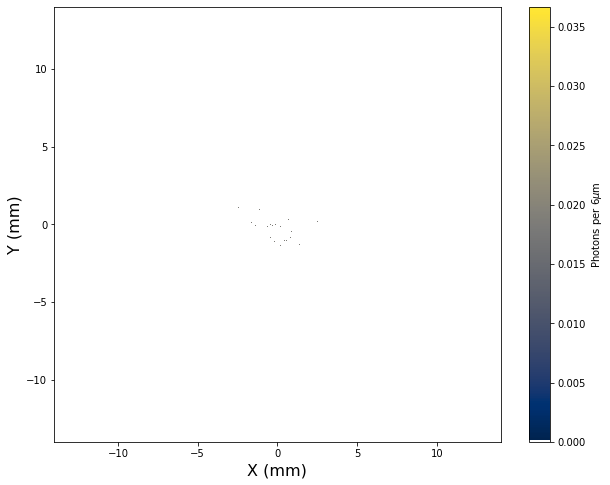

In [602]:
fig = plt.figure(figsize = (10,8))
# plt.ylim(-35, 15)
# plt.xlim(-25, 15)
p = plt.hist2d(x6_ii, y6_ii, bins = 4242, cmap = newcmp, range=np.array([(-14.0, 14.0), (-14.0, 14.0)]), 
               weights = image_weights6)
cbar = fig.colorbar(p[3], label = r'Photons per 6$\mu$m')
# cbar.set_label(r'Photons per 6$\mu$m', rotation = 270, fontsize=16)
fig.patch.set_facecolor("white")
plt.xlabel('X (mm)', fontsize=16)
plt.ylabel('Y (mm)', fontsize=16)
plt.title(r'Photons arriving on Image Intensifier from a $^{210}$Pb decay' + str(n), fontsize=16)
# plt.savefig('drifted_e_pb210_ii.png', dpi = 300)
plt.tight_layout()

# fig.set_zlabel('Photons per Electron')
plt.show()

In [281]:
image_weights1 = (np.ones(len(x1)) * 0.7271801856 * (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2) * (100 * 0.7 * 10) 
                  * 60000 * 0.2 * (np.pi*1.25**2)/(4*np.pi*(20)**2) * 0.90)

# image_weights2 = (np.ones(len(x2)) * (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2) * (100 * 0.7 * 10) 
#                   * 60000 * 0.2 * (np.pi*1.25**2)/(4*np.pi*(20)**2) * 0.90)

# image_weights3 = (np.ones(len(x3)) * (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2) * (100 * 0.7 * 10) 
#                   * 60000 * 0.2 * (np.pi*1.25**2)/(4*np.pi*(20)**2) * 0.90)

# image_weights4 = (np.ones(len(x4)) * (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2) * (100 * 0.7 * 10) 
#                   * 60000 * 0.2 * (np.pi*1.25**2)/(4*np.pi*(20)**2) * 0.90)

# # image_weights5 = (np.ones(len(x5)) * (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2) * (100 * 0.7 * 10) 
# #                   * 3000 * 0.2 * (np.pi*1.25**2)/(4*np.pi*(20)**2) * 0.90)

# image_weights6 = (np.ones(len(x6)) * (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2) * (100 * 0.7 * 10) 
#                   * 3000 * 0.2 * (np.pi*1.25**2)/(4*np.pi*(20)**2) * 0.90)

rng = np.array([(-4.0, 4.0), (-4.0, 4.0)])

print (image_weights1)

# image_weights1 = image_weights1/20
# pssn_weight = []
# for i in image_weights1:
#     for k in np.arange((i-), (i+501), 1):
#         photo_pssn_vals_500.append(k)
#         pssn_hits = poisson.pmf(np.floor(k), i)
#         photo_pssn_weight.append(pssn)

[0.26669908 0.26669908 0.26669908 ... 0.26669908 0.26669908 0.26669908]


In [289]:
p1, xedge1, yedge1 = np.histogram2d(x1_cam, y1_cam, bins = 512, range=rng, weights = image_weights1)
p1 = p1.T

p_test, xedge_test, yedge_test = np.histogram2d(x1_cam, y1_cam, bins = 512, range=rng)
p_test = p_test.T

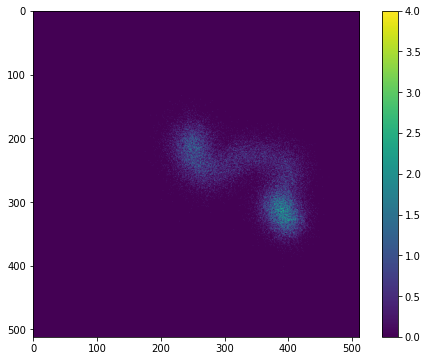

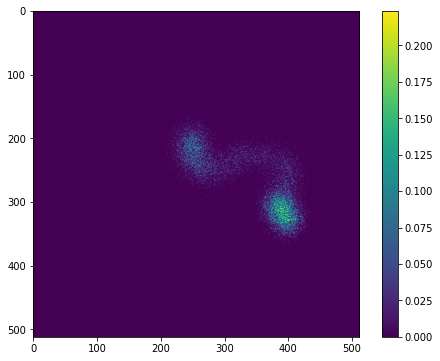

In [303]:
pssn_hits_weight = []
for i in p1:
    k = 3
#     photo_pssn_vals_500.append(k)
    pssn_hits = poisson.pmf(k, i)
    pssn_hits_weight.append(pssn_hits)

pssn_pixels = np.asarray(pssn_hits_weight).reshape(512,512)


plt.figure(figsize=(8,6))
plt.imshow(p1)
plt.colorbar()
plt.show()

plt.figure(figsize=(8,6))
plt.imshow(pssn_pixels*np.mean(p1)/np.mean(pssn_pixels))
plt.colorbar()
plt.show()

In [376]:
p2, xedge2, yedge2 = np.histogram2d(x2_cam, y2_cam, bins = 512, range=rng, 
               weights = image_weights2)
p2 = p2.T

In [377]:
p3, xedge3, yedge3 = np.histogram2d(x3_cam, y3_cam, bins = 512, range=rng, 
               weights = image_weights3)
p3 = p3.T

In [378]:
p4, xedge4, yedge4 = np.histogram2d(x4_cam, y4_cam, bins = 512, range=rng, 
               weights = image_weights4)
p4 = p4.T

In [379]:
# p5, xedge5, yedge5 = np.histogram2d(x5_cam, y5_cam, bins = 256, range=rng, 
#                weights = image_weights5)
# p5 = p5.T

In [380]:
p6, xedge6, yedge6 = np.histogram2d(x6_cam, y6_cam, bins = 256, range=rng, 
               weights = image_weights6)
p6 = p6.T

In [11]:
row,col= p1.shape
mean = 0
var = 0.003
sigma = var**0.5
pgauss = np.random.normal(mean,sigma,(row,col))
pgauss = pgauss.reshape(row,col)

In [153]:
p_tot = np.floor(p1) #+ p2 + p3 + p4 + 

In [13]:
row,col = p_tot.shape
s_vs_p = 1
amount = 0.003
# p_noise = np.copy(p_tot)
noise = np.zeros(p_tot.shape)
# Salt mode
num_salt = np.ceil(amount * p_tot.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt))
      for i in p_tot.shape]
noise[coords] = np.random.randint(1, 4, noise[coords].shape)
p_noise = p_tot + noise
# noise[coords] = np.random.randint(1, 10, p_noise[coords].shape)


# Pepper mode
num_pepper = np.ceil(amount* p_tot.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper))
      for i in p_tot.shape]
# p_noise[coords] = 0
# noise[coords] = 0

/var/folders/xl/k1n4jlvs6z96hhbr0szdjl5spf86mk/T/ipykernel_82647/2112032285.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  noise[coords] = np.random.randint(1, 4, noise[coords].shape)


In [158]:
pickle.dump( p_tot, open( "/Users/byrnesnk/programming/NKB/Camera Tracks/code/sim.p", "wb" ) )
# pickle.dump( p_noise, open( "noisy_sim.p", "wb" ) )
# pickle.dump( noise, open( "noise.p", "wb" ) )

In [828]:
print (p_noise) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


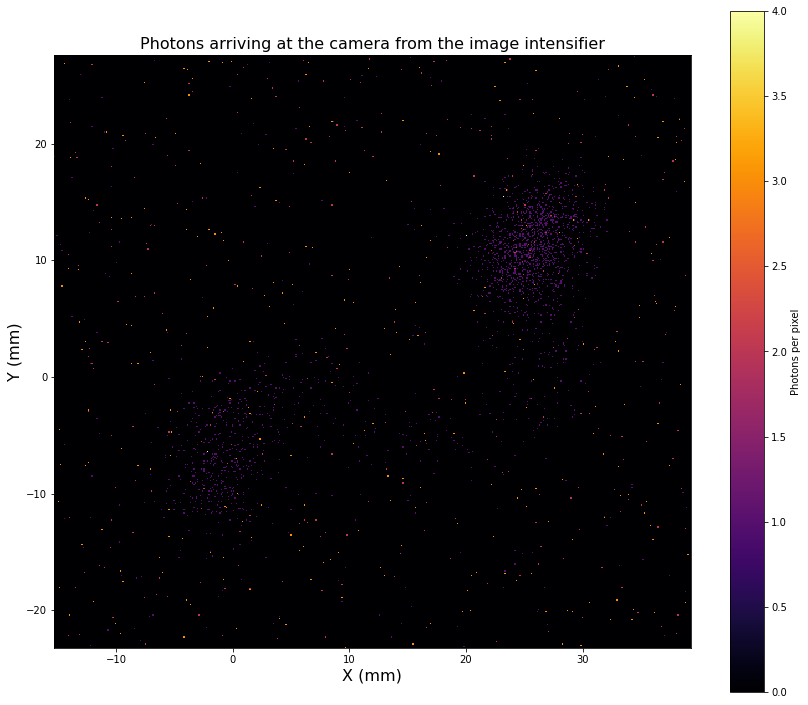

In [14]:
fig = plt.figure(figsize = (12,10))
# plt.ylim(-35, 15)
# plt.xlim(-25, 15)
im = plt.imshow(p_noise, interpolation='nearest', origin='lower',
                extent=[xedge1[0], xedge1[-1], yedge1[0], yedge1[-1]],
                cmap = 'inferno', vmin=np.min(p_noise), vmax=np.max(p_noise))
fig.colorbar(im,  label = r'Photons per pixel')
fig.patch.set_facecolor("white")
plt.xlabel('X (mm)', fontsize=16)
plt.ylabel('Y (mm)', fontsize=16)
plt.title(r'Photons arriving at the camera from the image intensifier', fontsize=16)
plt.savefig('drifted_e_pb210_cam.png', dpi = 300)
plt.tight_layout()

# ax.set_zlabel('Z (cm)')
plt.show()

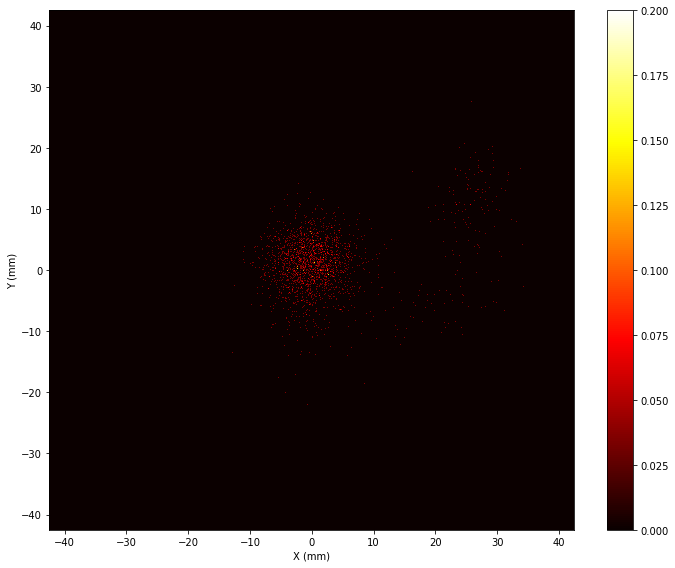

In [345]:
fig = plt.figure(figsize = (10,8))
# plt.ylim(-35, 15)
# plt.xlim(-25, 15)
p = plt.hist2d(x_a, y_a, bins = 6400, cmap = 'hot', range=np.array([(-42.5, 42.5), (-42.5, 42.5)]), 
               weights = image_weights_a, vmin = 0, vmax = 0.2)
fig.colorbar(p[3])
fig.patch.set_facecolor("white")
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.savefig('drifted_e_pb210_a.png', dpi = 300)
plt.tight_layout()

# ax.set_zlabel('Z (cm)')
plt.show()

In [26]:
print (p_test.shape)

(512, 512)


In [21]:
p_test, xedge_test, yedge_test = np.histogram2d(x1, y1, bins = 512, 
                                                weights = image_weights1)
p_test = p_test.T

In [158]:
hits_z[14][2]

0        5.350000
1105    54.473217
1106    56.078812
1107    57.404167
1108    58.365292
          ...    
1290    66.205215
1291    66.204567
1292    66.204475
1293    66.204338
1294    66.204140
Length: 80, dtype: float64

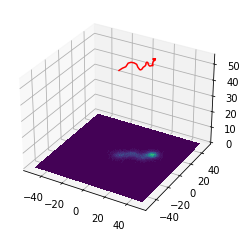

In [203]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contourf(xedge_scaled[3][0:-1], yedge_scaled[3][0:-1], p_scaled[3], zdir='z', 
            levels = 100, offset=0, cmap = 'viridis')
# ax.set_aspect('auto','box')
ax.set_zlim(0,55)
ax.plot3D(hits_x[3][0], hits_y[3][0], hits_z[3][0], 'red')
# ax.plot3D(hits_x[14][1], hits_y[14][1], hits_z[14][1], 'blue')
# ax.plot3D(hits_x[14][2], hits_y[14][2], hits_z[14][2], 'green')



# ax.set_box_aspect([1,1,1])
plt.show()

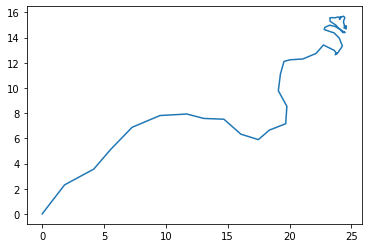

In [205]:
plt.plot(hits_x[3][0], hits_y[3][0])

In [185]:
pickle.dump( event_truth_test, open( "/Users/byrnesnk/programming/NKB/Camera Tracks/code/event_truth.p", "wb" ) )

In [665]:
particles = pd.DataFrame(np.array(h5py.File('Pb210_ei.h5')['MC']['particles']['event_id', 'particle_name']))

In [666]:
num = {}
for i in np.arange(0,500,1):
    num[i] = len(particles[(particles['particle_name'] == b'ie-' )&
                           (particles['event_id'] == i)]['particle_name'])
    print (i)
    
print (num)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [667]:
num = {}
num[0] = len(particles[(particles['particle_name'] == b'ie-' )&
                        (particles['event_id'] == i)]['particle_name'])

In [152]:
pickle.dump( num, open( "run7.p", "wb" ) )

In [230]:
ie = []

In [727]:
ie7 = pickle.load( open( "run7.p", "rb" ) )
ie.append(list(ie7.values()))
ie_flat = [item for sublist in ie for item in sublist]

In [231]:
# ie1 = pickle.load( open( "run1.p", "rb" ) )
ie2 = pickle.load( open( "run2.p", "rb" ) )
ie3 = pickle.load( open( "run3.p", "rb" ) )
ie4 = pickle.load( open( "run4.p", "rb" ) )
ie5 = pickle.load( open( "run5.p", "rb" ) )
ie6 = pickle.load( open( "run6.p", "rb" ) )

In [232]:
# ie.append(list(ie1.values()))
ie.append(list(ie2.values()))
ie.append(list(ie3.values()))
ie.append(list(ie4.values()))
ie.append(list(ie5.values()))
ie.append(list(ie6.values()))

In [233]:
ie_flat = [item for sublist in ie for item in sublist]

In [236]:
# solid_ang = (np.pi*0.5**2)/(4*np.pi*(12.37)**2)   ##PMT Position
solid_ang = (np.pi*0.5**2)/(4*np.pi*(33.18+2.29)**2)   ##Image Intensifier
# solid_ang = (np.pi*4**2)/(4*np.pi*(120)**2)

In [228]:
print (solid_ang)

4.96772607465626e-05


In [239]:
33.18+2.29

35.47

In [237]:
qe = 0.105

In [221]:
EL_Exp_2020 = 95.7*10*0.7
EL_Exp_2019 = (140*(10/(10*0.7))-116)*10*0.7
EL_Theory_2019 = (130*(10/(10*0.7))-80)*10*0.7
EL_Freitas = (151*(10/(10*0.7))-131)*10*0.7

EL_mean = np.mean([EL_Exp_2020, EL_Exp_2019, EL_Theory_2019, EL_Freitas])
EL_stdev = np.std([EL_Exp_2020, EL_Exp_2019, EL_Theory_2019, EL_Freitas])

In [223]:
print ("2020 Data = ", EL_Exp_2020)
print ("2019 Data = ", EL_Exp_2019)
print ("2019 Theory = ", EL_Theory_2019)
print ("2010 Data = ",EL_Freitas)

print ("\n\n\nMean=", EL_mean)
print ("Std=", EL_stdev)

2020 Data =  669.9
2019 Data =  588.0
2019 Theory =  740.0000000000001
2010 Data =  593.0



Mean= 647.725
Std= 62.38651196372502


In [238]:
photoelectrons = []
for i in ie_flat:
    if i > 0:
        print (i)
        photoelectrons.append(i * solid_ang * qe * EL_Exp_2019)

263137
260393
258828
261446
263314
268211
251937
246355
270164
257263
240073
272500
278754
265514
250494
257329
267046
252048
261628
264288
267982
250427
242834
251472
257912
256504
264564
247184
248198
250755
264460
240322
243399
260868
261199
245411
272252
270773
256809
250370
256226
252962
267287
267642
260295
275147
272745
276199
255666
269372
239550
243051
252402
277467
247511
246308
266112
242795
263042
251202
262448
254816
266352
247522
249506
251832
268801
262506
268829
245627
274153
243938
257443
245162
248521
253604
245471
248941
243577
256743
258975
270201
244935
262336
268409
258329
262709
264850
242746
258043
240609
246143
274703
256039
240245
247495
253635
241862
257350
251051
266774
240622
250482
248244
249999
246564
273288
242215
260525
259504
271360
249392
267054
265270
251686
271316
257840
253067
250141
250138
249101
238130
255997
273926
242108
260163
266495
256081
258314
250310
263081
249940
257593
244900
267959
254099
262436
251525
249675
241625
257373
254278
275811

In [777]:
pickle.dump( photoelectrons, open( "PE_Sim_II.p", "wb" ) )

In [785]:
avg = np.mean(photoelectrons)
print (avg)

939.0191591198914


39.80472040571173


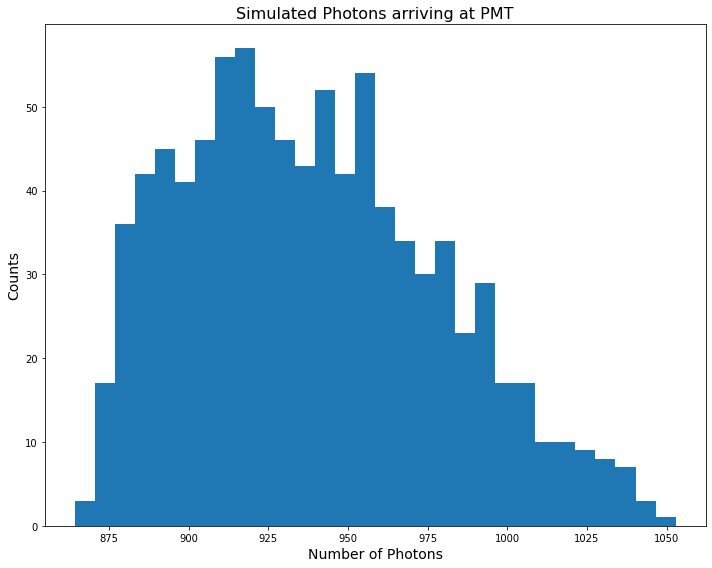

In [53]:
fig = plt.figure(figsize = (10,8))
# plt.xlim(1000, 1300)
plt.xlabel('Number of Photons', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Simulated Photons arriving at PMT',fontsize=16)
plt.hist(photoelectrons, bins = 30)
plt.tight_layout()
plt.savefig('Pb210_sim_photon_count_ii.png', dpi = 300)

print (np.std(photoelectrons))
plt.show()

In [96]:
photo_pssn_weight = []
photo_pssn_vals_500 = []

for i in photoelectrons:
    weight = []
    vals = []
    for k in np.arange((i-500), (i+501), 1):
        photo_pssn_vals_500.append(k)
        pssn_hits = poisson.pmf(np.floor(k), i)
        photo_pssn_weight.append(pssn)
        
hist_w = np.asarray(photo_pssn_weight)/(np.ones(len(photo_pssn_weight))*np.max(photo_pssn_weight))        
# hist_500_w = photo_pssn_weight/(np.ones(len(photo_pssn_weight))*np.max(photo_pssn_weight))        

# photo_mean = np.ones(len(photoelectrons))*np.mean(photoelectrons)

# mean_pssn_weight = []
# mean_pssn_vals = []
# for i in photo_mean:
#     weight = []
#     vals = []
#     for k in np.arange((i-100), (i+101), 1):
#         mean_pssn_vals.append(k)
#         pssn = poisson.pmf(np.floor(k), i)
#         mean_pssn_weight.append(pssn)
    
# mean_100_w = mean_pssn_weight/(np.ones(len(mean_pssn_weight))*np.max(mean_pssn_weight))    

395.72903788088087


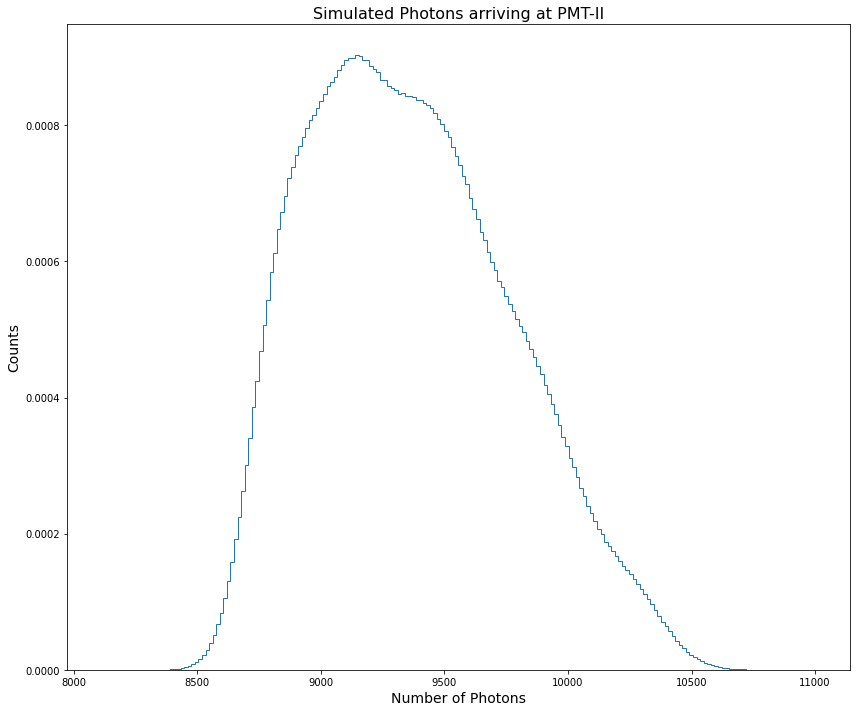

In [97]:
fig = plt.figure(figsize = (12,10))
fig.set_facecolor('white')
# plt.xlim(1050, 1250)
plt.xlabel('Number of Photons', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Simulated Photons arriving at PMT-II',fontsize=16)
plt.hist(photo_pssn_vals_500, bins = 200, weights=hist_w, histtype = 'step', density = True)
# plt.hist(photo_pssn_vals, bins = 200, weights=hist_500_w, histtype = 'step', density = True)
# plt.hist(mean_pssn_vals, bins = 200, weights=mean_100_w, histtype = 'step', density = True)
plt.tight_layout()
# plt.savefig('Pb210_sim_photon_count.png', dpi = 300)

print (np.std(photoelectrons))
plt.show()

39.694761255367936


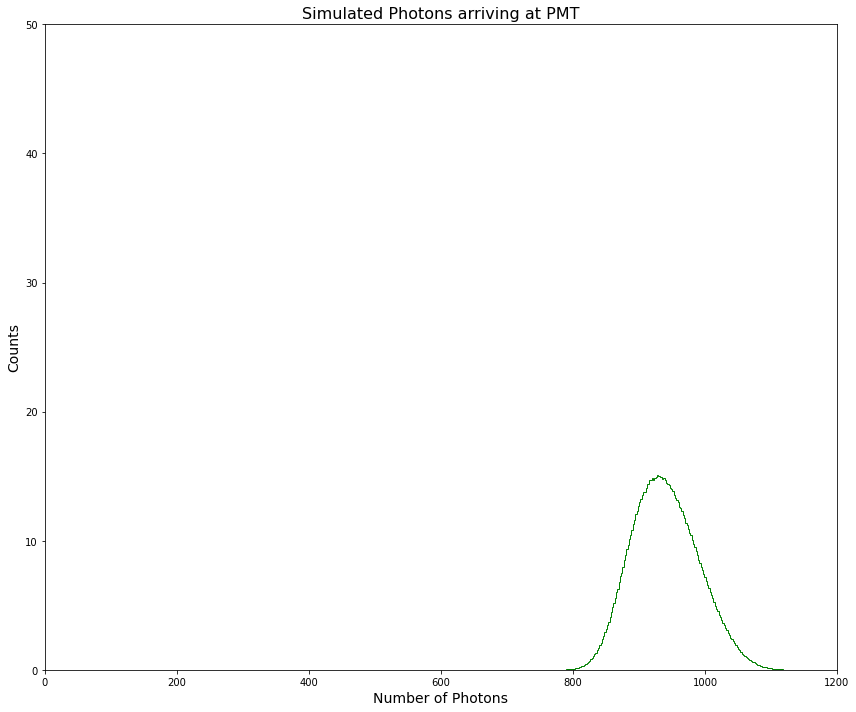

In [57]:
fig = plt.figure(figsize = (12,10))
plt.xlim(0, 1200)
plt.ylim(0,50)
plt.xlabel('Number of Photons', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)
plt.title('Simulated Photons arriving at PMT',fontsize=16)
plt.hist(photo_pssn_vals, bins = 200, weights=photo_pssn_weight, color = 'green', histtype = 'step')
# plt.hist(mean_pssn_vals, bins = 200, weights=mean_pssn_weight, histtype = 'step')
plt.tight_layout()
# plt.savefig('Pb210_sim_photon_count.png', dpi = 300)

print (np.std(photoelectrons))
plt.show()

In [72]:
pickle.dump( photo_pssn_vals_100, open( "PE_Sim_II_vals.p", "wb" ) )
pickle.dump( hist_w, open( "PE_Sim_II_weight.p", "wb" ) )

In [59]:
pwd


'/Users/byrnesnk/nexus'